In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from astropy.io import fits
import re
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

### ----------------------------------------- READ CONFIG FILE -----------------------------------------

In [2]:
config_file = 'Test/config.dat'

# Read the config file
with open(config_file, 'r') as f:
    lines = f.readlines()

# Extract relevant parameters from the config file
for line in lines:
    try:
        if line.startswith('OUTPATH'):
            outpath = line.split('=', 1)[1].split('#')[0].strip()
            outpath = str(outpath)
    except Exception as e:
        print(f"Error parsing OUTPATH: {e}")
    
    try:
        if line.startswith('INPATH'):
            inpath = line.split('=', 1)[1].split('#')[0].strip()
            inpath = str(inpath)
    except Exception as e:
        print(f"Error parsing INPATH: {e}")

    try:
        if line.startswith('RUNPATH'):
            runpath = line.split('=', 1)[1].split('#')[0].strip()
            runpath = str(runpath)
    except Exception as e:
        print(f"Error parsing RUNPATH: {e}")
    
    try:
        if line.startswith('CONSTRAINT'):
            constraint = line.split('=', 1)[1].split('#')[0].strip()
            constraint = str(constraint)
    except Exception as e:
        print(f"Error parsing CONSTRAINT: {e}")

    try:
        if line.startswith('OMEGA'):
            omega = line.split('=', 1)[1].split('#')[0].strip()
            omega = float(omega)
    except Exception as e:
        print(f"Error parsing OMEGA: {e}")
    
    try:
        if line.startswith('LAMBDA'):
            lambdac = line.split('=', 1)[1].split('#')[0].strip()
            lambdac = float(lambdac)
    except Exception as e:
        print(f"Error parsing LAMBDA: {e}")
    
    try:
        if line.startswith('WEOS'):
            weos = line.split('=', 1)[1].split('#')[0].strip()
            weos = float(weos)
    except Exception as e:
        print(f"Error parsing WEOS: {e}")

    try:
        if line.startswith('HUBBLE CONSTANT'):
            h0 = line.split('=', 1)[1].split('#')[0].strip()
            h0 = float(h0)
    except Exception as e:
        print(f"Error parsing HUBBLE CONSTANT: {e}")
    
    try:
        if line.startswith('X_LOW'):
            x_low = line.split('=', 1)[1].split('#')[0].strip()
            x_low = float(x_low)
    except Exception as e:
        print(f"Error parsing X_LOW: {e}")
    
    try:
        if line.startswith('X_UP'):
            x_up = line.split('=', 1)[1].split('#')[0].strip()
            x_up = float(x_up)
    except Exception as e:
        print(f"Error parsing X_UP: {e}")

    try:
        if line.startswith('Y_LOW'):
            y_low = line.split('=', 1)[1].split('#')[0].strip()
            y_low = float(y_low)
    except Exception as e:
        print(f"Error parsing Y_LOW: {e}")
    
    try:
        if line.startswith('Y_UP'):
            y_up = line.split('=', 1)[1].split('#')[0].strip()
            y_up = float(y_up)
    except Exception as e:
        print(f"Error parsing Y_UP: {e}")

    try:
        if line.startswith('EXTEN_PIX'):
            exten_pix = line.split('=', 1)[1].split('#')[0].strip()
            exten_pix = float(exten_pix)
    except Exception as e:
        print(f"Error parsing EXTEN_PIX: {e}")
    
    try:
        if line.startswith('POINT_PIX'):
            point_pix = line.split('=', 1)[1].split('#')[0].strip()
            point_pix = float(point_pix)
    except Exception as e:
        print(f"Error parsing POINT_PIX: {e}")

    try:
        if line.startswith('MAXLEV'):
            maxlev = line.split('=', 1)[1].split('#')[0].strip()
            maxlev = str(maxlev)
    except Exception as e:
        print(f"Error parsing MAXLEV: {e}")

    try:
        if line.startswith('CHI2_PLANE'):
            chi2_plane = line.split('=', 1)[1].split('#')[0].strip()
            chi2_plane = str(chi2_plane)
    except Exception as e:
        print(f"Error parsing CHI2_PLANE: {e}")
    
    try:
        if line.startswith('USEMAG'):
            usemag = line.split('=', 1)[1].split('#')[0].strip()
            usemag = int(usemag)
    except Exception as e:
        print(f"Error parsing USEMAG: {e}")

    try:
        if line.startswith('VARYH0'):
            varyh0 = line.split('=', 1)[1].split('#')[0].strip()
            varyh0 = int(varyh0)
    except Exception as e:
        print(f"Error parsing VARYH0: {e}")
    
    try:
        if line.startswith('READOBS'):
            readobs = line.split('=', 1)[1].split('#')[0].strip()
            readobs = str(readobs)
    except Exception as e:
        print(f"Error parsing READOBS: {e}")
    
    try:
        if line.startswith('OPTIMIZE'):
            optimize = line.split('=', 1)[1].split('#')[0].strip()
            optimize = int(optimize)
    except Exception as e:
        print(f"Error parsing OPTIMIZE: {e}")
    
    try:
        if line.startswith('FINDIMG'):
            findimg = line.split('=', 1)[1].split('#')[0].strip()
            findimg = int(findimg)
    except Exception as e:
        print(f"Error parsing FINDIMG: {e}")
    
    try:
        if line.startswith('WRITECRIT'):
            writecrit = line.split('=', 1)[1].split('#')[0].strip()
            writecrit = int(writecrit)
    except Exception as e:
        print(f"Error parsing WRITECRIT: {e}")
    
    try:
        if line.startswith('WRITELENS'):
            writelens = line.split('=', 1)[1].split('#')[0].strip()
            writelens = int(writelens)
    except Exception as e:
        print(f"Error parsing WRITELENS: {e}")

    try:
        if line.startswith('PRIOR'):
            prior = line.split('=', 1)[1].split('#')[0].strip()
            prior = int(prior)
    except Exception as e:
        print(f"Error parsing PRIOR: {e}")

    try:
        if line.startswith('MODEL'):
            basemodel = line.split('=', 1)[1].split('#')[0].strip()
            basemodel = str(basemodel)
    except Exception as e:
        print(f"Error parsing MODEL: {e}")
    
    try:
        if line.startswith('INIT_PARAM'):
            init_param = line.split('=', 1)[1].split('#')[0].strip()
            init_param = str(init_param)
    except Exception as e:
        print(f"Error parsing INIT_PARAM: {e}")
    
    try:
        if line.startswith('ZL'):
            zl = line.split('=', 1)[1].split('#')[0].strip()
            zl = float(zl)
    except Exception as e:
        print(f"Error parsing ZL: {e}")
    
    try:
        if line.startswith('FLUX_OBS_POS'):
            flux_obs_pos = line.split('=', 1)[1].split('#')[0].strip()
            flux_obs_pos = int(flux_obs_pos)
    except Exception as e:
        print(f"Error parsing FLUX_OBS_POS: {e}")
    
    try:
        if line.startswith('MAG_RATIO'):
            mag_ratio = line.split('=', 1)[1].split('#')[0].strip()
            mag_ratio = int(mag_ratio)
    except Exception as e:
        print(f"Error parsing MAG_RATIO: {e}")

    try:
        if line.startswith('BACKGROUND'):
            background = line.split('=', 1)[1].split('#')[0].strip()
            background = float(background)
    except Exception as e:
        print(f"Error parsing BACKGROUND: {e}")
    
    try:
        if line.startswith('PLOT_MODE'):
            plot_mode = line.split('=', 1)[1].split('#')[0].strip()
            plot_mode = int(plot_mode)
    except Exception as e:
        print(f"Error parsing PLOT_MODE: {e}")
    
    try:
        if line.startswith('PLOT_SAVE'):
            plot_save = line.split('=', 1)[1].split('#')[0].strip()
            plot_save = str(plot_save)
    except Exception as e:
        print(f"Error parsing PLOT_SAVE: {e}")
    
    try:
        if line.startswith('DPI'):
            dpi = line.split('=', 1)[1].split('#')[0].strip()
            dpi = int(dpi)
    except Exception as e:
        print(f"Error parsing DPI: {e}")
    
    try:
        if line.startswith('POSRMS_FLAG'):
            posrms_flag = line.split('=', 1)[1].split('#')[0].strip()
            posrms_flag = int(posrms_flag)
    except Exception as e:
        print(f"Error parsing POSRMS_FLAG: {e}")
    
    try:
        if line.startswith('FLUXRMS_FLAG'):
            fluxrms_flag = line.split('=', 1)[1].split('#')[0].strip()
            fluxrms_flag = int(fluxrms_flag)
    except Exception as e:
        print(f"Error parsing FLUXRMS_FLAG: {e}")
    
    try:
        if line.startswith('FLUXPER_FLAG'):
            fluxper_flag = line.split('=', 1)[1].split('#')[0].strip()
            fluxper_flag = int(fluxper_flag)
    except Exception as e:
        print(f"Error parsing FLUXPER_FLAG: {e}")
    
    try:
        if line.startswith('CRIT_FLAG'):
            crit_flag = line.split('=', 1)[1].split('#')[0].strip()
            crit_flag = int(crit_flag)
    except Exception as e:
        print(f"Error parsing CRIT_FLAG: {e}")
    
    try:
        if line.startswith('KAPPA_FLAG'):
            kappa_flag = line.split('=', 1)[1].split('#')[0].strip()
            kappa_flag = int(kappa_flag)
    except Exception as e:
        print(f"Error parsing KAPPA_FLAG: {e}")
    
    try:
        if line.startswith('TDRMS_FLAG'):
            tdrms_flag = line.split('=', 1)[1].split('#')[0].strip()
            tdrms_flag = int(tdrms_flag)
    except Exception as e:
        print(f"Error parsing TDRMS_FLAG: {e}")
    
    try:
        if line.startswith('TDPER_FLAG'):
            tdper_flag = line.split('=', 1)[1].split('#')[0].strip()
            tdper_flag = int(tdper_flag)
    except Exception as e:
        print(f"Error parsing TDPER_FLAG: {e}")

    try:
        if line.startswith('DEFLECT_FLAG'):
            deflect_flag = line.split('=', 1)[1].split('#')[0].strip()
            deflect_flag = int(deflect_flag)
    except Exception as e:
        print(f"Error parsing DEFLECT_FLAG: {e}")
    
    try:
        if line.startswith('TABLE_FLAG'):
            table_flag = line.split('=', 1)[1].split('#')[0].strip()
            table_flag = int(table_flag)
    except Exception as e:
        print(f"Error parsing TABLE_FLAG: {e}")

print(f"Using outpath: {outpath}")
print(f"Using inpath: {inpath}")
print(f"Using constraint: {constraint}")
print(f"Using omega: {omega}")
print(f"Using lambda: {lambdac}")
print(f"Using weos: {weos}")
print(f"Using Hubble constant: {h0}")
print(f"Using x_low: {x_low}")
print(f"Using x_up: {x_up}")
print(f"Using y_low: {y_low}")
print(f"Using y_up: {y_up}")
print(f"Using exten_pix: {exten_pix}")
print(f"Using point_pix: {point_pix}")
print(f"Using maxlev: {maxlev}")
print(f"Using chi2_plane: {chi2_plane}")
print(f"Using varyh0: {varyh0}")
print(f"Using usemag: {usemag}")
print(f"Using readobs: {readobs}")
print(f"Using optimize: {optimize}")
print(f"Using findimg: {findimg}")
print(f"Using writecrit: {writecrit}")
print(f"Using writelens: {writelens}")
print(f"Using model: {basemodel}")
print(f"Using init_param: {init_param}")
print(f"Using zl: {zl}")
print(f"Using flux_obs_pos: {flux_obs_pos}")
print(f"Using mag_ratio: {mag_ratio}")
print(f"Using background: {background}")
print(f"Using plot_mode: {plot_mode}")
print(f"Using plot_save: {plot_save}")
print(f"Using dpi: {dpi}")
print(f"Using posrms_flag: {posrms_flag}")
print(f"Using fluxrms_flag: {fluxrms_flag}")
print(f"Using fluxper_flag: {fluxper_flag}")
print(f"Using crit_flag: {crit_flag}")
print(f"Using kappa_flag: {kappa_flag}")
print(f"Using tdrms_flag: {tdrms_flag}")
print(f"Using tdper_flag: {tdper_flag}")
print(f"Using deflect_flag: {deflect_flag}")
print(f"Using table_flag: {table_flag}")
print("Config file read successfully.")

Using outpath: Output
Using inpath: Input
Using constraint: pos+flux+td
Using omega: 0.3
Using lambda: 0.7
Using weos: -1.0
Using Hubble constant: 0.7
Using x_low: -3.5
Using x_up: 3.5
Using y_low: -3.5
Using y_up: 3.5
Using exten_pix: 0.01
Using point_pix: 0.01
Using maxlev: 1
Using chi2_plane: 1
Using varyh0: 0
Using usemag: 0
Using readobs: input.dat
Using optimize: 1
Using findimg: 1
Using writecrit: 1
Using writelens: 1
Using model: POW+SHEAR
Using init_param: 'Random'
Using zl: 0.23
Using flux_obs_pos: 1
Using mag_ratio: 0
Using background: 0.0
Using plot_mode: 0
Using plot_save: Plots
Using dpi: 300
Using posrms_flag: 1
Using fluxrms_flag: 1
Using fluxper_flag: 1
Using crit_flag: 1
Using kappa_flag: 1
Using tdrms_flag: 1
Using tdper_flag: 1
Using deflect_flag: 1
Using table_flag: 1
Config file read successfully.


In [3]:
# Checking for conflicts in configuration
try:
    if usemag == 0 and mag_ratio == 1:
        print("Conflict in configuration: MAG_RATIO cannot be 1 when USEMAG is 0. Setting MAG_RATIO to 0.")
        print("Please accept this change:")
        input("Press Enter to continue...")
        if True:
            mag_ratio = 0
        else:
            raise ValueError("User did not accept the change.")
        print(f"Final configuration - USEMAG: {usemag}, MAG_RATIO: {mag_ratio}")
except Exception as e:
    print(f"Error checking configuration: {e}")

if background == 1:
    bckg = 'black'
else:
    bckg = 'white'


### --------------------------------------------- OBS POINT ---------------------------------------------

In [4]:
# Obs Point File Reading
obs_columns = ['x', 'y', 'mag', 'pos_err', 'mag_err', 'td', 'td_err', 'parity']
first_row_columns = ['id', 'n_img', 'zs', 'zs_err']
obs_point = pd.read_csv(f'{inpath}/obs_point+flux.dat', skiprows=1, header=None, names=obs_columns, delim_whitespace=True)
first_row = pd.read_csv(f'{inpath}/obs_point+flux.dat', nrows=1, header=None, names=first_row_columns, delim_whitespace=True)

In [5]:
n_img = first_row['n_img'][0]
zs = first_row['zs'][0]
zs_err = first_row['zs_err'][0]

In [6]:
# Assigning Names to the Images
# Find brightest image
brightest_index = obs_point['mag'].idxmax()
obs_point.at[brightest_index, 'Img'] = 'A'

# Clockwise assignment of names from Img A 
def assign_image_names(df, start_index):
    names = ['A', 'B', 'C', 'D']
    current_name_index = 0
    current_index = start_index
    assigned_indices = {current_index}
    
    while len(assigned_indices) < len(df):
        current_x, current_y = df.at[current_index, 'x'], df.at[current_index, 'y']
        next_index = None
        max_angle = -float('inf')
        
        for i in range(len(df)):
            if i in assigned_indices:
                continue
            dx = df.at[i, 'x'] - current_x
            dy = df.at[i, 'y'] - current_y
            angle = np.arctan2(dy, dx)
            if angle > max_angle:
                max_angle = angle
                next_index = i
        
        if next_index is not None:
            current_name_index += 1
            df.at[next_index, 'Img'] = names[current_name_index]
            assigned_indices.add(next_index)
            current_index = next_index

assign_image_names(obs_point, brightest_index)


In [7]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C
1,0.832,-1.220,1.00,0.005,0.02,5.0,0.0,0,A
2,-0.686,-1.191,0.79,0.005,0.02,10.0,0.0,0,B
3,0.706,0.869,0.39,0.005,0.01,23.0,0.0,0,D


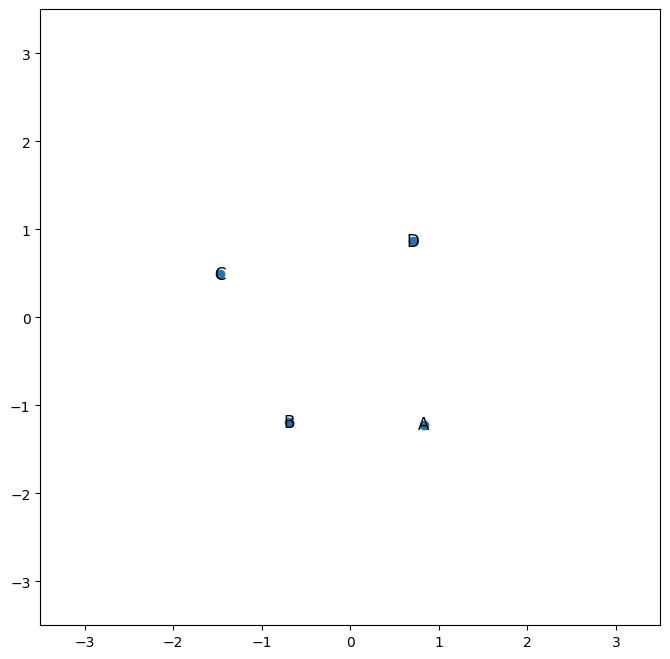

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(obs_point['x'], obs_point['y'])
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
for i, row in obs_point.iterrows():
    plt.text(row['x'], row['y'], row['Img'], fontsize=12, ha='center', va='center')

In [9]:
df = pd.DataFrame(0, columns=obs_columns, index=range(int(first_row.at[0, 'n_img'])))
df

,x,y,mag,pos_err,mag_err,td,td_err,parity
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0


In [10]:
# Generate the obs_point.dat file

# Building the file
with open(f'{runpath}/input.dat', 'w') as f:
    f.write(f"{first_row.at[0, 'id']} {first_row.at[0, 'n_img']} {first_row.at[0, 'zs']} {first_row.at[0, 'zs_err']}\n")

    df = pd.DataFrame(0, columns=obs_columns, index=range(int(first_row.at[0, 'n_img'])))

    if 'pos' in constraint:
        df['x'] = obs_point['x']
        df['y'] = obs_point['y']
        df['pos_err'] = obs_point['pos_err']
    
    if 'flux' in constraint:
        df['mag'] = obs_point['mag']
        df['mag_err'] = obs_point['mag_err']

    if 'td' in constraint:
        df['td'] = obs_point['td']
        df['td_err'] = obs_point['td_err']
    
    if 'parity' in constraint:
        df['parity'] = obs_point['parity']
    
    f.write(df.to_string(header=False, index=False))
    
    # Save the file 
    print(f"File '{inpath}/input.dat' generated successfully.")

File 'Input/input.dat' generated successfully.


### --------------------------------------- INITIAL GUESS GENERATION+READING ---------------------------------------

In [11]:
# Define the lens corresponding parameters (order preserved)
# POW
pow_params = ['$z_{s,fid}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{Ein}$', '$\gamma (PWI)$']

# SIE
sie_params = ['$\sigma$', 'x', 'y', 'e', '$θ_{e}$', '$r_{core}$', 'NaN']

# NFW
nfw_params = ['M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', 'NaN']

# EIN
ein_params = ['M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', r'$\alpha_{e}$']

# SHEAR 
shear_params = ['$z_{s,fid}$', 'x', 'y', '$\gamma$', '$θ_{\gamma}$', 'NaN', '$\kappa$']

# Sersic
sersic_params = ['$M_{tot}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{e}$', '$n$']

# MPOLE 
mpole_params = ['$z_{s,fid}$', 'x', 'y', '$\eta$', '$\\theta_{m}$', 'm', 'n']

model_list = ['POW', 'SIE', 'ANFW', 'EIN', 'PERT', 'SERS', 'MPOLE']
model_params = {
    'POW': pow_params,
    'SIE': sie_params,
    'ANFW': nfw_params,
    'EIN': ein_params,
    'PERT': shear_params,
    'SERS': sersic_params,
    'MPOLE': mpole_params
}


In [12]:
models = basemodel.split('+') 
models

['POW', 'SHEAR']

In [13]:
number_of_lenses = len(models)
print(f"Number of lenses detected: {number_of_lenses}")

if init_param.strip("'\"") == 'Manual':

    with open('{inpath}/init_param.dat', 'w') as f:
        f.write('# Mode: Manual\n')
        f.write('\n')
        for model in models:
            model = model.strip()
            if model in model_params:
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess:                                                                                                         ')
                f.write('\n')
                f.write(f'Flags:                                                                                                         ')
                f.write('\n\n')
            elif model == 'SHEAR':
                model = 'PERT'
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess:                                                                                                         ')
                f.write('\n')
                f.write(f'Flags:                                                                                                         ')
                f.write('\n\n')
            else:
                print(f"Warning: Model '{model}' not recognized. Skipping.\n")
        f.write('# Parameter Initial Guesses for Source:\n')
        f.write('       $z_{s,fid}$       x       y\n')
        f.write('Guess:                                                                                                         \n')
        f.write('Flags:                                                                                                         \n\n')
    
    print(f"File '{inpath}/init_param.dat' generated successfully.")


Number of lenses detected: 2


In [14]:
# Automatic Parameter Generation

def ell_gen():
    e = np.random.uniform(0.0, 0.7)
    return e

def pa_gen():
    pa = np.random.uniform(0.0, 360)
    return pa

def r_ein_gen():
    r_ein = np.random.uniform(0.1, 2.0)
    return r_ein

def pwi_gen():
    pwi = np.random.uniform(1.5, 2.5)
    return pwi

def sigma_gen():
    sigma = np.random.uniform(120, 220)
    return sigma

def r_core_gen():
    r_core = np.random.uniform(0.0, 0.5)
    return r_core

def M_gen():
    M = np.random.uniform(1e10, 1e13)
    return M

def c_gen():
    c = np.random.uniform(30, 90)
    return c

def alpha_e_gen():
    alpha_e = np.random.uniform(1.0, 3.0)
    return alpha_e

def gamma_gen():
    gamma = np.random.uniform(0.0, 0.1)
    return gamma

def kappa_gen():
    kappa = np.random.uniform(0.0, 0.6)
    return kappa

def eta_gen():
    eta = np.random.uniform(0.0, 0.1)
    return eta

def m_gen():
    m = np.random.randint(2, 6)
    return m

def n_gen():
    n = np.random.uniform(1.5, 2.5)
    return n

def nan_gen():
    nan_gen = 0
    return nan_gen


In [15]:
# Reading the init_params file 
init_file = f'{runpath}/init_param.dat'

if init_param.strip("'\"") == 'Manual':
    # Read the Init Params file
    with open(init_file, 'r') as f:
        lines = f.readlines()

    initial_guesses = []
    param_flags = []

    # Extract relevant parameters from the config file
    for line in lines:
        try:
            if line.startswith('Guess'):
                guess = line.split(':', 1)[1].split()
                initial_guesses.append(guess)
        except Exception as e:
            print(f"Error parsing GUESS: {e}")

    for line in lines:
        try:
            if line.startswith('Flags'):
                flags = line.split(':', 1)[1].split()
                param_flags.append(flags)
        except Exception as e:
            print(f"Error parsing FLAGS: {e}")
            
elif init_param.strip("'\"") == 'Random':
    print("Using Random Initial Parameters")

    random_params = []

    param1 = zl # Always the lens redshift
    param3 = (x_low + x_up) / 2 # x position
    param4 = (y_low + y_up) / 2 # y position

    for model in models:
        model = model.strip()
        if model == 'POW':
            param2 = zs
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = r_ein_gen()
            param8 = pwi_gen()
        elif model == 'SIE':
            param2 = sigma_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = nan_gen() # CORED SIE IGNORED
            param8 = nan_gen()
        elif model == 'NFW':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = c_gen()
            param8 = nan_gen()
        elif model == 'EIN':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = c_gen()
            param8 = alpha_e_gen()
        elif model == 'SHEAR' or model == 'PERT':
            param2 = zs
            param5 = gamma_gen()
            param6 = pa_gen()
            param7 = nan_gen()
            param8 = kappa_gen()
        elif model == 'SERS':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = r_ein_gen()
            param8 = nan_gen()
        elif model == 'MPOLE':
            param2 = zs
            param5 = eta_gen()
            param6 = pa_gen()
            param7 = m_gen()
            param8 = n_gen()

        else:
            print(f"Warning: Model '{model}' not recognized. Skipping.\n")

        random_params.append([param1, param2, param3, param4, param5, param6, param7, param8])

    # Source Parameters
    param9 = zs
    param10 = (x_low + x_up) / 2
    param11 = (y_low + y_up) / 2
    random_params.append([param9, param10, param11])

    initial_guesses = random_params
    param_flags = [['1'] * len(guess) for guess in random_params]

    with open(f'{runpath}/init_param.dat', 'w') as f:
        f.write('# Mode: Random\n')
        f.write('\n')
        for i, model in enumerate(models):
            model = model.strip()
            if model in model_params:
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess: {"       ".join(map(str, initial_guesses[i]))}\n')
                f.write(f'Flags: {"       ".join(param_flags[i])}\n\n')
            elif model == 'SHEAR':
                model = 'PERT'
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess: {"       ".join(map(str, initial_guesses[i]))}\n')
                f.write(f'Flags: {"       ".join(param_flags[i])}\n\n')
            else:
                print(f"Warning: Model '{model}' not recognized. Skipping.\n")
        f.write('# Parameter Initial Guesses for Source:\n')
        f.write('       $z_{s,fid}$       x       y\n')
        f.write(f'Guess: {"       ".join(map(str, initial_guesses[-1]))}\n')
        f.write(f'Flags: {"       ".join(param_flags[-1])}\n\n')

for i in range(len(initial_guesses)):
    initial_guesses[i] = [str(x) for x in initial_guesses[i]]


Using Random Initial Parameters


In [16]:
param_flags

[['1', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1']]

In [17]:
initial_guesses

[['0.23',
  '0.777',
  '0.0',
  '0.0',
  '0.6447090755510764',
  '150.20202315013992',
  '0.4958589921767823',
  '2.202636726342293'],
 ['0.23',
  '0.777',
  '0.0',
  '0.0',
  '0.06441436996779147',
  '172.97236818834614',
  '0',
  '0.44050696762523023'],
 ['0.777', '0.0', '0.0']]

### --------------------------------------- PYTHON FILE GENERATION ---------------------------------------

In [18]:
save_path = outpath + '/' + str(basemodel)
print(save_path)

Output/POW+SHEAR


In [19]:
with open(f'{runpath}/model.py', 'w') as f:
    f.write("import glafic\n\n")
    f.write(f"glafic.init({omega}, {lambdac}, {weos}, {h0}, '{save_path}', {x_low}, {y_low}, {x_up}, {y_up}, {exten_pix}, {point_pix}, {maxlev}, verb=0)\n\n")
    f.write(f"glafic.set_secondary('chi2_splane {chi2_plane}', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_checknimg 0', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_restart -1', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_usemag {usemag}', verb=0)\n")
    if varyh0 == 1:
        f.write(f"glafic.set_secondary('hvary 1', verb=0)\n")
    else:
        f.write(f"glafic.set_secondary('hvary 0', verb=0)\n")
    for model in models:
        if model == 'NFW' or model == 'EIN' or model == 'ANFW':
            print("NFW detected, setting flag_hodensity to 2")
            f.write(f"glafic.set_secondary('flag_hodensity 2', verb=0)\n")
    f.write(f"glafic.set_secondary('ran_seed -122000', verb=0)\n\n")
    f.write(f"glafic.startup_setnum({number_of_lenses}, 0, 1)\n")
    for i in range(number_of_lenses):
        if models[i] == 'SHEAR':
            models[i] = 'PERT'
        if models[i]  == 'NFW':
            models[i] = 'ANFW'
        f.write(f"glafic.set_lens({i+1}, '{models[i].lower()}', " + ', '.join(initial_guesses[i]) + ")\n")
        f.write(f"glafic.setopt_lens({i+1}, " + ', '.join(param_flags[i]) + ")\n\n")
    f.write(f"glafic.set_point(1, " + ', '.join(initial_guesses[-1]) + ")\n")
    f.write(f"glafic.setopt_point(1, " + ', '.join(param_flags[-1]) + ")\n\n")
    f.write(f"glafic.model_init(verb=0)\n\n")
    f.write(f"glafic.readobs_point('{runpath}/{readobs}')\n")
    if prior == 1:
        f.write(f"glafic.parprior({inpath}/prior.dat)\n")
    if optimize == 1:
        f.write(f"glafic.optimize()\n")
    if findimg == 1:
        f.write(f"glafic.findimg()\n")
    if writecrit == 1:
        f.write(f"glafic.writecrit({zs})\n")
    if writelens == 1:
        f.write(f"glafic.writelens({zs})\n")
    f.write(f"\n")
    f.write(f"glafic.quit()\n")
    print(f"File '{runpath}/model.py' generated successfully.")

File 'Run/model.py' generated successfully.


### --------------------------------------- READING OUTPUT FILES ---------------------------------------

In [20]:
opt_file = save_path + '_optresult.dat'
crit_file = save_path + '_crit.dat'
lens_file = save_path + '_lens.fits'
point_file = save_path + '_point.dat'

def calculate_distance(row1, row2):
    return np.sqrt((row1['x'] - row2['x'])**2 + (row1['y'] - row2['y'])**2)

# Reading the files
if findimg == 1:
    try:
        pred_point = pd.read_csv(point_file, skiprows=1, header=None, delim_whitespace=True, names=['x', 'y', 'mag', 'td'])
        num_pred_images = len(pred_point)

        if num_pred_images > n_img:
            print(f"Warning: Number of predicted images ({num_pred_images}) exceeds number of observed images ({n_img}).")
            print("Automatic matching of images\n")

            # Matching predicted images to observed images based on proximity
            distance_matrix = np.zeros((n_img, num_pred_images))
            for i in range(n_img):
                for j in range(num_pred_images):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])

            # The lowest n_img distances will be considered matches
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == n_img:
                    break
            
            # Perform row switching such that all matches are in order of observed images
            matches.sort(key=lambda x: x[0])

            # Keep only matched predicted images
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)

            pred_point['Img'] = obs_point['Img'].values
        
        if num_pred_images < n_img:
            print(f"Warning: Number of predicted images ({num_pred_images}) is less than number of observed images ({n_img}).")

            # Matching predicted images to observed images based on proximity
            distance_matrix = np.zeros((n_img, num_pred_images))
            for i in range(n_img):
                for j in range(num_pred_images):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])
            
            # The lowest num_pred_images distances will be considered matches
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == num_pred_images:
                    break
            
            # Assign names to matched predicted images
            matches.sort(key=lambda x: x[0])
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)
            pred_point['Img'] = [obs_point.at[obs_idx, 'Img'] for obs_idx, _ in matches]

        if num_pred_images == n_img:
            
            # Directly assign names based on proximity
            distance_matrix = np.zeros((n_img, n_img))
            for i in range(n_img):
                for j in range(n_img):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])
            
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == n_img:
                    break
            matches.sort(key=lambda x: x[0])
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)
            pred_point['Img'] = [obs_point.at[obs_idx, 'Img'] for obs_idx, _ in matches]


    except Exception as e:
        print(f"Error reading predicted point file: {e}")

In [21]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C
1,0.832,-1.220,1.00,0.005,0.02,5.0,0.0,0,A
2,-0.686,-1.191,0.79,0.005,0.02,10.0,0.0,0,B
3,0.706,0.869,0.39,0.005,0.01,23.0,0.0,0,D


In [22]:
pred_point

,x,y,mag,td,Img
0,-1.4721,0.4885,2.5722,0.000,C
1,0.8333,-1.2209,3.1052,5.207,A
2,-0.6873,-1.1914,-2.4172,10.931,B
3,0.7042,0.8697,-1.1598,26.331,D


In [23]:
# Reading Critical and Caustics
if writecrit == 1:
    try:
        crit_data = pd.read_csv(crit_file, header=None, delim_whitespace=True, names=['xi_1', 'yi_1', 'xs_1', 'ys_1', 'x1i_2', 'yi_2', 'xs_2', 'ys_2'])
    except Exception as e:
        print(f"Error reading critical file: {e}")

In [24]:
# Reading the FITS file 
if writelens == 1:
    try:
        lens_hdu = fits.open(lens_file)
        lens_data = lens_hdu[0].data
        lens_header = lens_hdu[0].header
        lens_hdu.close()

        alpha_x = lens_data[0]
        alpha_y = lens_data[1]
        td = lens_data[2]
        kappa = lens_data[3]
        gamma1 = lens_data[4]
        gamma2 = lens_data[5]
        mu_invert = lens_data[6]
        rotation = lens_data[7]
    except Exception as e:
        print(f"Error reading lens FITS file: {e}")

# Preparing the deflection angle 
# Ensure we use the correct shape order (ny, nx) and avoid plotting an overly dense quiver
alpha = np.sqrt(alpha_x**2 + alpha_y**2)
ny, nx = alpha_x.shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
U = alpha_x 
V = alpha_y

# Downsample the vector field for plotting to avoid huge memory / rendering cost
step = max(1, nx // 10)
Xs = X[::step, ::step]
Ys = Y[::step, ::step]
Us = U[::step, ::step]
Vs = V[::step, ::step]
alphas = alpha[::step, ::step]

In [25]:
# Reading the optimization results
if optimize == 1:
    try:
        with open(opt_file, 'r') as file:
            opt_result = file.readlines()

        last_optimize_index = None
        for idx in range(len(opt_result) - 1, -1, -1):
            if 'optimize' in opt_result[idx]:
                last_optimize_index = idx
                break
        if last_optimize_index is None:
            raise ValueError("No line with 'optimize' found in the file.")

        opt_result = opt_result[last_optimize_index + 1:]

        lens_params_dict = {}
        lens_params = []
        for line in opt_result:
            if line.startswith('lens'):
                parts = re.split(r'\s+', line.strip())
                lens_name = parts[1]
                params = [float(x) for x in parts[2:]]
                lens_params_dict[lens_name] = params
                lens_params.append((lens_name, params))
        if lens_params:
            for i in range(len(lens_params)):
                lens_name, params = lens_params[i]
                lens_params_dict[lens_name] = params[1:]

        source_params = []
        for line in opt_result:
            if line.startswith('point'):
                parts = re.split(r'\s+', line.strip())
                params = [float(x) for x in parts[1:]]
                source_params.append(params)
        
        chi2_line = next((line for line in opt_result if 'chi^2' in line), None)
        if chi2_line is None:
            raise ValueError("No line with 'chi2' found in the file.")
        chi2_value = float(chi2_line.split('=')[-1].strip().split()[0])
        num_lens_profiles = len(lens_params_dict)

        if varyh0 == 1:
            hubble = next((line for line in opt_result if 'hubble =' in line), None)
            hubble = hubble.split('=')[-1].strip().split()[0]
        
        df = pd.DataFrame()
        rows = []
        max_param_len = 0
        for lens_name, params in lens_params_dict.items():
            row = {'Lens Name': lens_name}
            for i, val in enumerate(params): row[f'param{i+1}'] = val
            rows.append(row)
            if len(params) > max_param_len: max_param_len = len(params)
        columns = ['Lens Name'] + [f'param{i+1}' for i in range(max_param_len)]
        df = pd.DataFrame(rows, columns=columns)
    except Exception as e:
        print(f"Error reading optimization results file: {e}")

### ------------------------------ PLOTTING --------------------------------

In [26]:
# Preprocessing for Plotting
# Assigning Colours 
obs_point['Color'] = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
color_map = obs_point.set_index('Img')['Color'].to_dict()
pred_point['Color'] = pred_point['Img'].map(color_map)

# Calculating RMS
num_obs_point = len(obs_point)
num_pred_point = len(pred_point)

if num_obs_point == num_pred_point:
    image_rms = []
    for i in range(num_obs_point):
        dist = np.sqrt((obs_point.at[i, 'x'] - pred_point.at[i, 'x'])**2 + (obs_point.at[i, 'y'] - pred_point.at[i, 'y'])**2)
        image_rms.append(dist)
        pos_rms = np.sqrt(np.sum(np.array(image_rms)**2) / num_obs_point)
    pred_point['pos_rms'] = image_rms
    print(f"Position RMS: {pos_rms}")
    print(f"Image-wise Position RMS: {image_rms}")
elif num_obs_point > num_pred_point:
    image_rms = []
    for i in range(num_pred_point):
        obs_row = obs_point[obs_point['Img'] == pred_point.at[i, 'Img']].iloc[0]
        dist = np.sqrt((obs_row['x'] - pred_point.at[i, 'x'])**2 + (obs_row['y'] - pred_point.at[i, 'y'])**2)
        image_rms.append(dist)
        pos_rms = np.sqrt(np.sum(np.array(image_rms)**2) / num_pred_point)
    pred_point['pos_rms'] = image_rms
    print(f"Position RMS (based on predicted images): {pos_rms}")
    print(f"Image-wise Position RMS: {image_rms}")
                      

# Order according to Img names
obs_point = obs_point.sort_values(by='Img').reset_index(drop=True)
pred_point = pred_point.sort_values(by='Img').reset_index(drop=True)

# Processing for Magnification/Flux Ratios
# Extracting the Magnifications at the observed image positions
fits = fits.open(lens_file)
mag_map = fits[0].data[6]
fits.close()
flux_map = 1/mag_map

for i in range(len(pred_point)):
    x_pos = obs_point.at[i, 'x']
    y_pos = obs_point.at[i, 'y']
    # Convert x_pos and y_pos to pixel indices
    x_pos_pix = (x_pos/point_pix).round().astype(int)
    y_pos_pix = (y_pos/point_pix).round().astype(int)
    pred_point.at[i, 'mag_at_obs'] = flux_map[y_pos_pix, x_pos_pix]

    # Error bars
    x_pos_err = obs_point.at[i, 'pos_err']
    y_pos_err = obs_point.at[i, 'pos_err']
    x_pos_upper = ((x_pos + x_pos_err)/point_pix).round().astype(int)
    x_pos_lower = ((x_pos - x_pos_err)/point_pix).round().astype(int)
    y_pos_upper = ((y_pos + y_pos_err)/point_pix).round().astype(int)
    y_pos_lower = ((y_pos - y_pos_err)/point_pix).round().astype(int)
    pred_point.at[i, 'mag_at_upper'] = flux_map[y_pos_upper, x_pos_upper]
    pred_point.at[i, 'mag_at_lower'] = flux_map[y_pos_lower, x_pos_lower]

pred_point['mag'] = abs(pred_point['mag'])

if usemag == 0:
    pred_point['mag'] = pred_point['mag']/max(pred_point['mag'])
    pred_point['mag_at_obs'] = abs(pred_point['mag_at_obs']/max(pred_point['mag_at_obs']))

if usemag == 1 & mag_ratio == 1:
    pred_point['mag'] = abs(pred_point['mag']/max(pred_point['mag']))
    pred_point['mag_at_obs'] = abs(pred_point['mag_at_obs']/max(pred_point['mag_at_obs']))


# Flux/Magnification Ratios RMS
flux_rms = []
for i in range(len(pred_point)):
    diff = pred_point.at[i, 'mag'] - obs_point.at[i, 'mag']
    flux_rms.append(diff)
    flux_rms_value = np.sqrt(np.sum(np.array(flux_rms)**2) / len(pred_point))
pred_point['flux_rms'] = flux_rms
print(f"Flux/Magnification RMS: {flux_rms_value}")
print(f"Image-wise Flux/Magnification RMS: {flux_rms}")

# Percentage Errors in Predicted Magnification/Flux
percentage_errors = []
for i in range(len(pred_point)):
    perc_error = abs((pred_point.at[i, 'mag'] - obs_point.at[i, 'mag']) / obs_point.at[i, 'mag']) * 100
    percentage_errors.append(perc_error)
avg_percentage_error = np.mean(percentage_errors)
pred_point['percentage_error'] = percentage_errors
print(f"Average Percentage Error in Predicted Magnification/Flux: {avg_percentage_error}")
print(f"Percentage Errors in Predicted Magnification/Flux: {percentage_errors}")

# Critical Curves and Caustics Data Processing
if writecrit == 1:
    def interpolate_curve(points, num_interp_points=100000):
        xi, yi = points[:, 0], points[:, 1]
        x_c, y_c = np.mean(xi), np.mean(yi)
        angles = np.arctan2(yi - y_c, xi - x_c)
        sort_indices = np.argsort(angles)
        x_sorted, y_sorted = xi[sort_indices], yi[sort_indices]
        x = np.append(x_sorted, x_sorted[0])
        y = np.append(y_sorted, y_sorted[0])
        distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
        t = np.insert(np.cumsum(distance), 0, 0)
        t_interp = np.linspace(t.min(), t.max(), num_interp_points)
        x_interp = np.interp(t_interp, t, x)
        y_interp = np.interp(t_interp, t, y)
        return x_sorted, y_sorted, x_interp, y_interp
    
    crit_data = crit_data.sort_values(by=['xi_1', 'yi_1']).reset_index(drop=True)
    points = crit_data[['xi_1', 'yi_1']].values
    center = points.mean(axis=0)
    radii = np.sqrt(np.sum((points - center)**2, axis=1))
    counts, bin_edges = np.histogram(radii, bins=150)
    noise_floor = 2
    populated_indices = np.where(counts > noise_floor)[0]
    gaps = np.diff(populated_indices)
    largest_gap_idx = np.argmax(gaps)
    end_of_first_cluster_idx = populated_indices[largest_gap_idx]
    start_of_second_cluster_idx = populated_indices[largest_gap_idx + 1]
    threshold = (bin_edges[end_of_first_cluster_idx + 1] + bin_edges[start_of_second_cluster_idx]) / 2
    inner_points = points[radii < threshold]
    outer_points = points[radii >= threshold]

    xi_sorted_inner, yi_sorted_inner, xi_interp_inner, yi_interp_inner = interpolate_curve(inner_points)
    xi_sorted_outer, yi_sorted_outer, xi_interp_outer, yi_interp_outer = interpolate_curve(outer_points)

    points = crit_data[['xs_1', 'ys_1']].values
    center = points.mean(axis=0)
    radii = np.sqrt(np.sum((points - center)**2, axis=1))
    counts, bin_edges = np.histogram(radii, bins=150)
    noise_floor = 2
    populated_indices = np.where(counts > noise_floor)[0]
    gaps = np.diff(populated_indices)
    largest_gap_idx = np.argmax(gaps)
    end_of_first_cluster_idx = populated_indices[largest_gap_idx]
    start_of_second_cluster_idx = populated_indices[largest_gap_idx + 1]
    threshold = (bin_edges[end_of_first_cluster_idx + 1] + bin_edges[start_of_second_cluster_idx]) / 2
    inner_points = points[radii < threshold]
    outer_points = points[radii >= threshold]

    xs_sorted_inner, ys_sorted_inner, xs_interp_inner, ys_interp_inner = interpolate_curve(inner_points)
    xs_sorted_outer, ys_sorted_outer, xs_interp_outer, ys_interp_outer = interpolate_curve(outer_points)

# Processing the Kappa
if writelens == 1:
    kappa_min = np.min(kappa)
    kappa = kappa + abs(kappa_min)

# Time Delay Processing
constraints = constraint.split('+')
if 'td' in constraints:
    for i in range(len(pred_point)):
        diff = pred_point.at[i, 'td'] - obs_point.at[i, 'td']
        pred_point.at[i, 'td_rms'] = diff
    percentage_errors_td = [abs(pred_point.at[i, 'td_rms'] / obs_point.at[i, 'td']) * 100 for i in range(len(pred_point)) if obs_point.at[i, 'td'] != 0]
    for i in range(len(pred_point)):
        if obs_point.at[i, 'td'] == 0:
            percentage_errors_td.insert(i, 0)
    pred_point['td_percentage_error'] = percentage_errors_td
    print(f"Time Delay Percentage Errors: {percentage_errors_td}")
    avg_percentage_error_td = np.mean(percentage_errors_td) if percentage_errors_td else 0
    print(f"Average Percentage Error in Predicted Time Delays: {avg_percentage_error_td}")
    print(f"Time Delay Errors: {[pred_point.at[i, 'td_rms'] for i in range(len(pred_point))]}")
    td_rms = np.sqrt(np.sum(pred_point['td_rms']**2) / len(pred_point))
    print(f"Time Delay RMS: {td_rms}")

# Table of results for plotting
first_header = 'Cosmology'
first_row = [f'$\omega$ = {omega}', f'$\Lambda$ = {lambdac}', f'$w$ = {weos}', f'$H_0$ = {(h0 * 100):.2f}']
second_header = 'Lens Model'

all_lens_model_rows = []

for i in range(len(lens_params)):
    model_name = lens_params[i][0].upper()

    param_names_row = [(lens_params[i][0].upper())] + ['$z_{lens}$'] + model_params.get(model_name, [])
    initial_values_row = ['Input'] + [f'{float(p):.3f}' for p in initial_guesses[i]]
    # Round numbers to 3 decimal places
    optimized_params = [f'{p:.3f}' for p in lens_params[i][1]]
    optimized_values_row = ['Optimized'] + optimized_params
    flags_row = ['Flags'] + param_flags[i]
    
    if i > 0:
        all_lens_model_rows.append(['']) 
        
    all_lens_model_rows.extend([param_names_row, initial_values_row, optimized_values_row, flags_row])
    
source_header = 'Source'
source_model_rows = []

source_param_names_row = ['Source', '$z_{source}$', 'x', 'y']
source_initial_values_row = ['Input'] + [f'{float(p):.3f}' for p in initial_guesses[-1]]
optimized_source_params = [f'{p:.3f}' for p in source_params[0]]
source_optimized_values_row = ['Optimized'] + optimized_source_params
source_flags_row = ['Flags'] + param_flags[-1]

source_model_rows.extend([source_param_names_row, source_initial_values_row, source_optimized_values_row, source_flags_row])

sections_to_plot = [
    (first_header, [first_row]),
    (second_header, all_lens_model_rows),
    (source_header, source_model_rows)
]


Position RMS: 0.001727715254317106
Image-wise Position RMS: [0.0019646882704388623, 0.0015811388300843244, 0.0013601470508735006, 0.0019313207915827276]
Flux/Magnification RMS: 0.01875804645476052
Image-wise Flux/Magnification RMS: [0.0, -0.01156382841684922, -0.03164755893340199, -0.016497488084503464]
Average Percentage Error in Predicted Magnification/Flux: 2.343462403006804
Percentage Errors in Predicted Magnification/Flux: [0.0, 1.4637757489682557, 3.6799487131862776, 4.230125149872683]
Time Delay Percentage Errors: [4.139999999999997, 9.309999999999992, 0, 14.482608695652171]
Average Percentage Error in Predicted Time Delays: 6.98315217391304
Time Delay Errors: [0.20699999999999985, 0.9309999999999992, 0.0, 3.3309999999999995]
Time Delay RMS: 1.7324239521548987


In [27]:
pred_point

,x,y,mag,td,Img,Color,pos_rms,mag_at_obs,mag_at_upper,mag_at_lower,flux_rms,percentage_error,td_rms,td_percentage_error
0,0.8333,-1.2209,1.000000,5.207,A,tab:orange,0.001581,0.734497,1.048201,1.047063,0.000000,0.000000,0.207,4.140000
1,-0.6873,-1.1914,0.778436,10.931,B,tab:green,0.001360,1.000000,1.421498,1.426644,-0.011564,1.463776,0.931,9.310000
2,-1.4721,0.4885,0.828352,0.000,C,tab:blue,0.001965,0.736980,1.050603,1.050658,-0.031648,3.679949,0.000,0.000000
3,0.7042,0.8697,0.373503,26.331,D,tab:purple,0.001931,0.967667,1.379460,1.374899,-0.016497,4.230125,3.331,14.482609


In [28]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img,Color
0,0.832,-1.220,1.00,0.005,0.02,5.0,0.0,0,A,tab:orange
1,-0.686,-1.191,0.79,0.005,0.02,10.0,0.0,0,B,tab:green
2,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C,tab:blue
3,0.706,0.869,0.39,0.005,0.01,23.0,0.0,0,D,tab:purple


In [29]:
def plotting(obs_point, pred_point, bkg='white', posrms=False, fluxrms=False, fluxpercent=False, critcurves=False, kappamap=False, timedelays=False, timedelaypercent=False, deflectionfield=False, table=False, ):
    num_obs_images = len(obs_point)

    if bkg == 'black':
        plt.style.use('dark_background')
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["figure.dpi"] = 300
        plt.rcParams.update({'axes.facecolor': 'black', 'figure.facecolor': 'black'})
    else:
        plt.style.use('default')
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["figure.dpi"] = 300
        plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})

    # Plotting coefficients
    scaling = 0.1
    text_scaling = 0.04

    # Adjust figsize and bar_width based on the number of images
    if num_obs_images < 4:
        figsize = (max(4, 2 * num_obs_images), 6)
        bar_width = 0.4
    else:
        figsize = (8, 8)
        bar_width = 0.5

    # Plotting for POS
    plt.figure(figsize=figsize)
    bar_container = plt.bar(pred_point['Img'], pred_point['pos_rms'], color=pred_point['Color'], width=bar_width,
                            edgecolor='black' if bkg == 'white' else 'white')
    ax = plt.gca()

    legend_label_added = False
    for i, bar_patch in enumerate(bar_container.patches):
        img_name = pred_point['Img'].iloc[i]
        obs_error_for_img = obs_point.loc[obs_point['Img'] == img_name, 'pos_err'].values[0]

        ax_left, ax_right = ax.get_xlim()
        ax_width = ax_right - ax_left
        bar_left = bar_patch.get_x()
        bar_right = bar_left + bar_patch.get_width()
        xmin_rel = (bar_left - ax_left) / ax_width
        xmax_rel = (bar_right - ax_left) / ax_width
        
        label = ""
        if not legend_label_added:
            label = '$1 \sigma$'
            legend_label_added = True

        plt.axhline(y=obs_error_for_img,
                    xmin=xmin_rel,
                    xmax=xmax_rel,
                    color='r',
                    linestyle='--',
                    linewidth=2,
                    label=label)
    
    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax + scaling * (ymax - ymin))
    plt.xlabel('Image')
    plt.ylabel('Position Offset')
    if legend_label_added:
        plt.legend()
    plt.title('Position RMS = {:.4f}"'.format(pos_rms))
    plt.show()

    # Plotting for Magnification/Relative Flux
    plt.figure(figsize=figsize)
    x = np.arange(len(obs_point['Img']))
    obs_img_list = list(obs_point['Img'])
    pred_indices = [obs_img_list.index(img) for img in pred_point['Img']]

    if flux_obs_pos == 1:
        width = 0.2 if num_obs_images < 4 else 0.25
        plt.bar(x, obs_point['mag'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
        plt.errorbar(x, obs_point['mag'], yerr=obs_point['mag_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
        plt.bar(np.array(pred_indices) - width, pred_point['mag'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
        plt.bar(np.array(pred_indices) + width, pred_point['mag_at_obs'], width, label='Predicted at Obs Pos', color='black' if bkg == 'black' else 'white', hatch='o', edgecolor='white' if bkg == 'black' else 'black')
        plt.errorbar(np.array(pred_indices) + width, pred_point['mag_at_obs'], yerr=[abs(pred_point['mag_at_obs'] - pred_point['mag_at_lower']), abs(pred_point['mag_at_upper'] - pred_point['mag_at_obs'])], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black')
    else:
        width = 0.3 if num_obs_images < 4 else 0.35
        plt.bar(x + width/2, obs_point['mag'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
        plt.errorbar(x + width/2, obs_point['mag'], yerr=obs_point['mag_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
        plt.bar(np.array(pred_indices) - width/2, pred_point['mag'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')

    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax + scaling * (ymax - ymin))
    plt.xticks(x, obs_point['Img'])
    plt.legend()
    plt.xlabel('Image')
    if usemag == 0:
        plt.ylabel('Flux Ratios')
        plt.title('Flux Ratio RMS = {:.4f}'.format(flux_rms_value))
    if usemag == 1:
        plt.ylabel('Absolute Magnification')
        plt.title('Absolute Magnification RMS = {:.4f}'.format(flux_rms_value))
    if usemag == 1 and mag_ratio == 1:
        plt.ylabel('Absolute Magnification Ratios')
        plt.title('Absolute Magnification Ratio RMS = {:.4f}'.format(flux_rms_value))
    plt.show()

    # Plotting Flux Ratios Percentage Diff
    plt.figure(figsize=figsize)
    plt.bar(pred_point['Img'], pred_point['percentage_error'], color=pred_point['Color'], width=bar_width,
            edgecolor='black' if bkg == 'white' else 'white')
    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax + scaling * (ymax - ymin))
    plt.xlabel('Image')
    if usemag == 0:
        plt.ylabel('Percentage Error in Flux Ratios (%)')
    if usemag == 1:
        plt.ylabel('Percentage Error in Absolute Magnification (%)')
    if usemag == 1 and mag_ratio == 1:
        plt.ylabel('Percentage Error in Absolute Magnification Ratios (%)')
    plt.title('Average Percentage Error = {:.2f}%'.format(avg_percentage_error))
    plt.show()

    # Plotting the critical curves and caustics
    plt.figure(figsize=(8, 8))
    plt.plot(xi_interp_inner, yi_interp_inner, color='red', label = 'Critical Curves')
    plt.plot(xi_interp_outer, yi_interp_outer, color='red')
    plt.plot(xs_interp_inner, ys_interp_inner, color='white' if bkg == 'black' else 'black', label = 'Caustics')
    plt.plot(xs_interp_outer, ys_interp_outer, color='white' if bkg == 'black' else 'black')
    plt.scatter(obs_point['x'], obs_point['y'], color=obs_point['Color'], label='Observed Images', marker='x', s=100)
    plt.scatter(pred_point['x'], pred_point['y'], color=pred_point['Color'], label='Predicted Images', marker='o', facecolors=pred_point['Color'], s=30)
    if source_params:
        plt.scatter(source_params[0][1], source_params[0][2], color='yellow', label='Source Position', marker='*', s=100)
    if lens_params:
        plt.scatter(lens_params[0][1][2], lens_params[0][1][3], color='cyan', label='Lens Position', marker='^', s=80)
    xmax, xmin = plt.xlim()
    for i in range(len(pred_point)):
        plt.text(pred_point.at[i, 'x'] + (text_scaling * (xmax - xmin)), pred_point.at[i, 'y'], pred_point.at[i, 'Img'], color= 'white' if bkg == 'black' else 'black', fontsize=12)
    plt.xlabel('X Position (arcsec)')
    plt.ylabel('Y Position (arcsec)')
    plt.title('Critical Curves and Caustics')
    plt.legend()
    plt.axis('equal')
    plt.show()

    # Plotting the Convergence Map
    if kappa is not None:
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        vmin = np.min(kappa[kappa > 0])
        vmax = np.max(kappa)
        im = ax.imshow(kappa, origin='lower', cmap='inferno', norm=LogNorm(vmin=vmin, vmax=vmax), aspect='equal', extent=[x_low, x_up, y_low, y_up])
        num_contours = 10
        levels = np.logspace(np.log10(vmin), np.log10(vmax), num_contours)
        ax.contour(kappa, levels=levels, colors='white' if bkg == 'black' else 'black', extent=[x_low, x_up, y_low, y_up], origin='lower')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax, label='Convergence ($\\kappa$)')
        ax.set_xlabel('X Position (arcsec)')
        ax.set_ylabel('Y Position (arcsec)')
        ax.set_title('Convergence Map')
        plt.show()

    # Plotting the Time Delays
    plt.figure(figsize=figsize)
    x = np.arange(len(obs_point['Img']))
    obs_img_list_td = list(obs_point['Img'])
    pred_indices_td = [obs_img_list_td.index(img) for img in pred_point['Img']]
    width = 0.3 if num_obs_images < 4 else 0.35

    plt.bar(x + width/2, obs_point['td'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
    plt.errorbar(x + width/2, obs_point['td'], yerr=obs_point['td_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
    plt.bar(np.array(pred_indices_td) - width/2, pred_point['td'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
    
    ax = plt.gca()
    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax + scaling * (ymax - ymin))
    plt.xticks(x, obs_point['Img'])
    plt.xlabel('Image')
    plt.ylabel('Time Delay (days)')
    if 'td' in constraints:
        plt.title('Time Delay RMS = {:.4f} days'.format(td_rms))
    else:
        plt.title('Time Delays')
    plt.legend()
    plt.show()

    # Plotting Time Delay Percentage Errors
    if 'td' in constraints:
        plt.figure(figsize=figsize)
        plt.bar(pred_point['Img'], pred_point['td_percentage_error'], color=pred_point['Color'], width=bar_width,
                edgecolor='black' if bkg == 'white' else 'white')
        ymin, ymax = plt.ylim()
        plt.ylim(ymin, ymax + scaling * (ymax - ymin))
        plt.xlabel('Image')
        plt.ylabel('Percentage Error in Time Delays (%)')
        plt.title('Average Percentage Error in Time Delays = {:.2f}%'.format(avg_percentage_error_td))
        plt.show()
    
    # Plot the Table
    def plot_parameter_table(sections, precision=3):
        table_data = []
        header_indices = []
        data_indices = []

        for header, rows in sections:
            header_indices.append(len(table_data))
            table_data.append([header])
            
            start_index = len(table_data)
            data_indices.extend(range(start_index, start_index + len(rows)))

            # Re-round and sanitize numbers
            formatted_rows = []
            for row in rows:
                # Check if the row is a "Flags" row to avoid re-rounding
                if row and str(row[0]).strip().lower() == 'flags':
                    formatted_rows.append([str(val) for val in row])
                    continue

                formatted_row = []
                for val in row:
                    try:
                        num = float(val)
                        if np.isnan(num):
                            formatted_row.append("NaN")
                        else:
                            formatted_row.append(f"{num:.{precision}f}")
                    except (ValueError, TypeError):
                        formatted_row.append(str(val))
                formatted_rows.append(formatted_row)
            table_data.extend(formatted_rows)

        if not table_data:
            print("No data to plot.")
            return

        max_cols = max(len(row) for row in table_data)
        for row in table_data:
            row.extend([''] * (max_cols - len(row)))

        # --- Plotting ---
        fig, ax = plt.subplots(figsize=(12, 5))
        ax.axis('tight')
        ax.axis('off')

        the_table = ax.table(
            cellText=table_data,
            loc='center',
            cellLoc='left'
        )

        # --- Styling ---
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(10)
        the_table.scale(1.1, 1.4)

        # Make the table fill the width evenly
        total_width = 1.0
        col_width = total_width / max_cols
        for j in range(max_cols):
            for i in range(len(table_data)):
                the_table[(i, j)].set_width(col_width)

        # --- Header styling ---
        for header_idx in header_indices:
            for j in range(max_cols):
                cell = the_table[(header_idx, j)]
                cell.set_facecolor("#363636")
                cell.set_text_props(weight='bold', color='white', ha='center', fontsize=12)
                cell.visible_edges = "horizontal"
            the_table[(header_idx, 0)].visible_edges = "closed"

        # --- Data row styling ---
        for data_idx in data_indices:
            for j in range(max_cols):
                cell = the_table[(data_idx, j)]
                text = cell.get_text().get_text()
                cell.set_text_props(color='black', fontsize=10)
                try:
                    float(text)
                    cell._text.set_ha('center')
                except ValueError:
                    cell._text.set_ha('center')

        plt.title("Model Parameters Summary", pad=20, fontsize=13, weight='bold')
        plt.tight_layout()
        plt.show()

    plot_parameter_table(sections_to_plot)

    # Plotting the deflection field 
    plt.figure(figsize=(8, 8))
    plt.quiver(Xs, Ys, Us, Vs, alphas, cmap='autumn', scale=20, width=0.005)
    plt.colorbar(label='Deflection Angle')
    plt.xlabel('X Position (pixels)')
    plt.ylabel('Y Position (pixels)')
    plt.title('Deflection Angle Field')
    plt.axis('equal')
    plt.show()
    

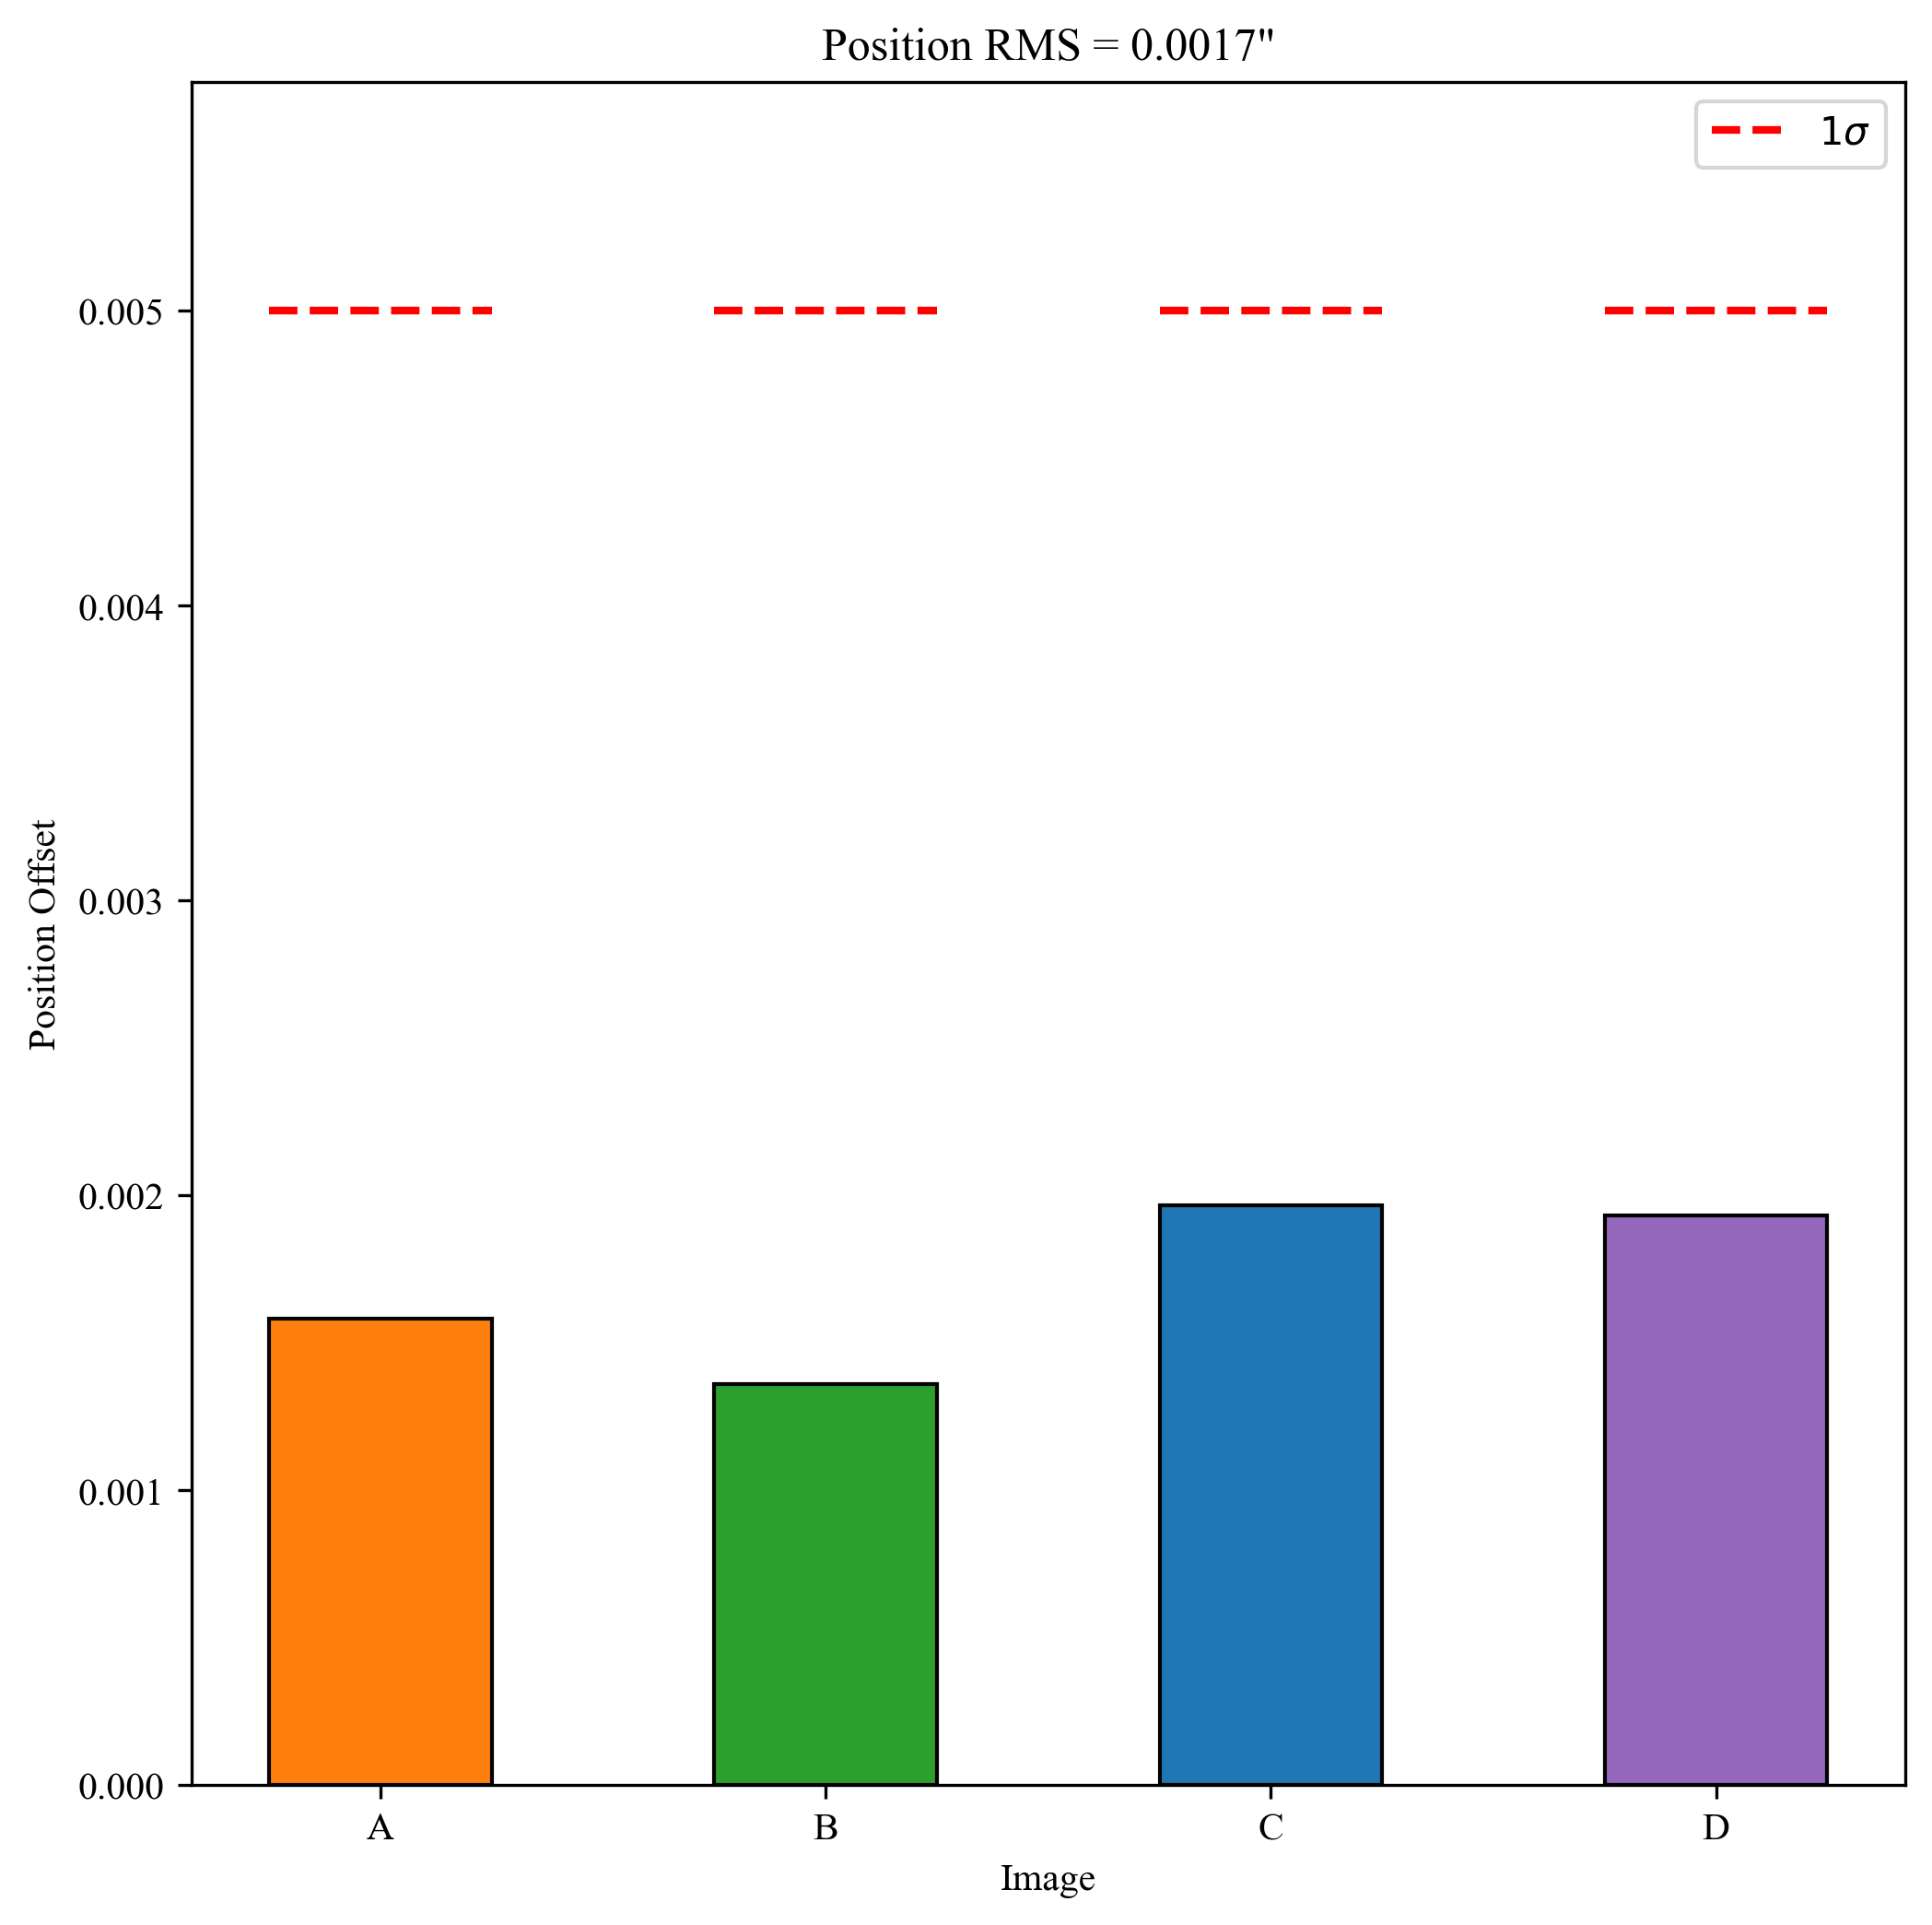

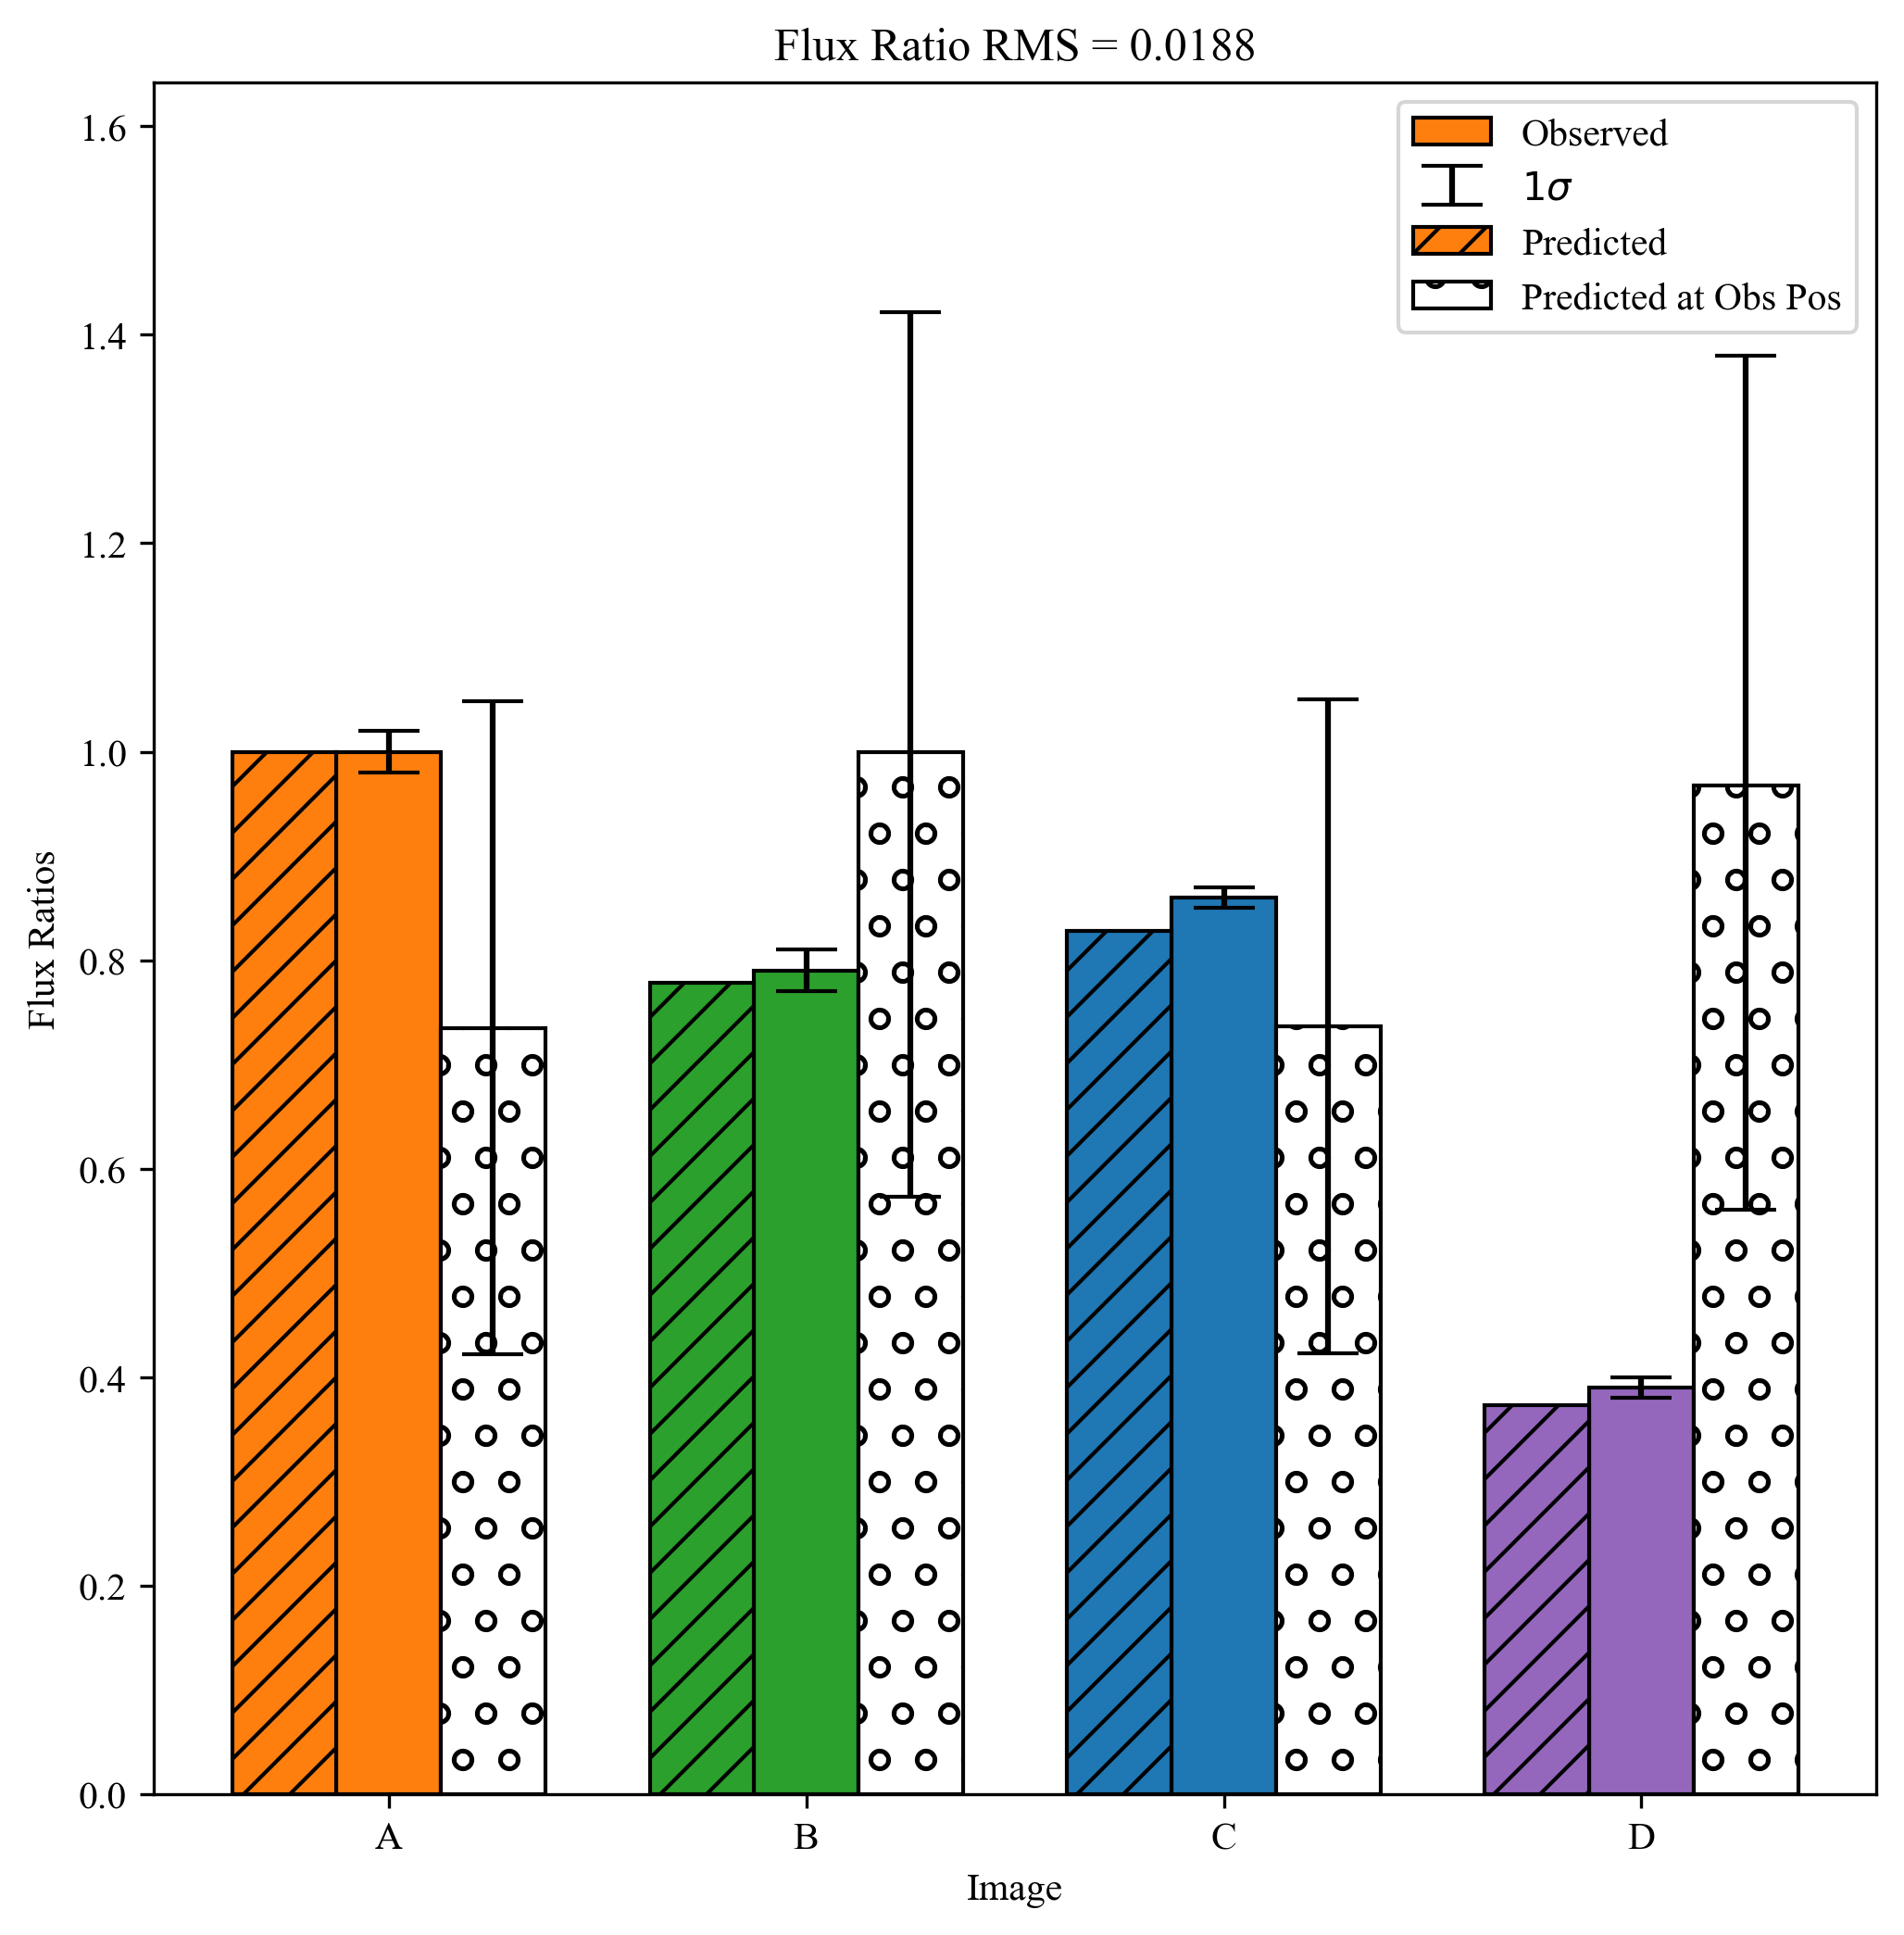

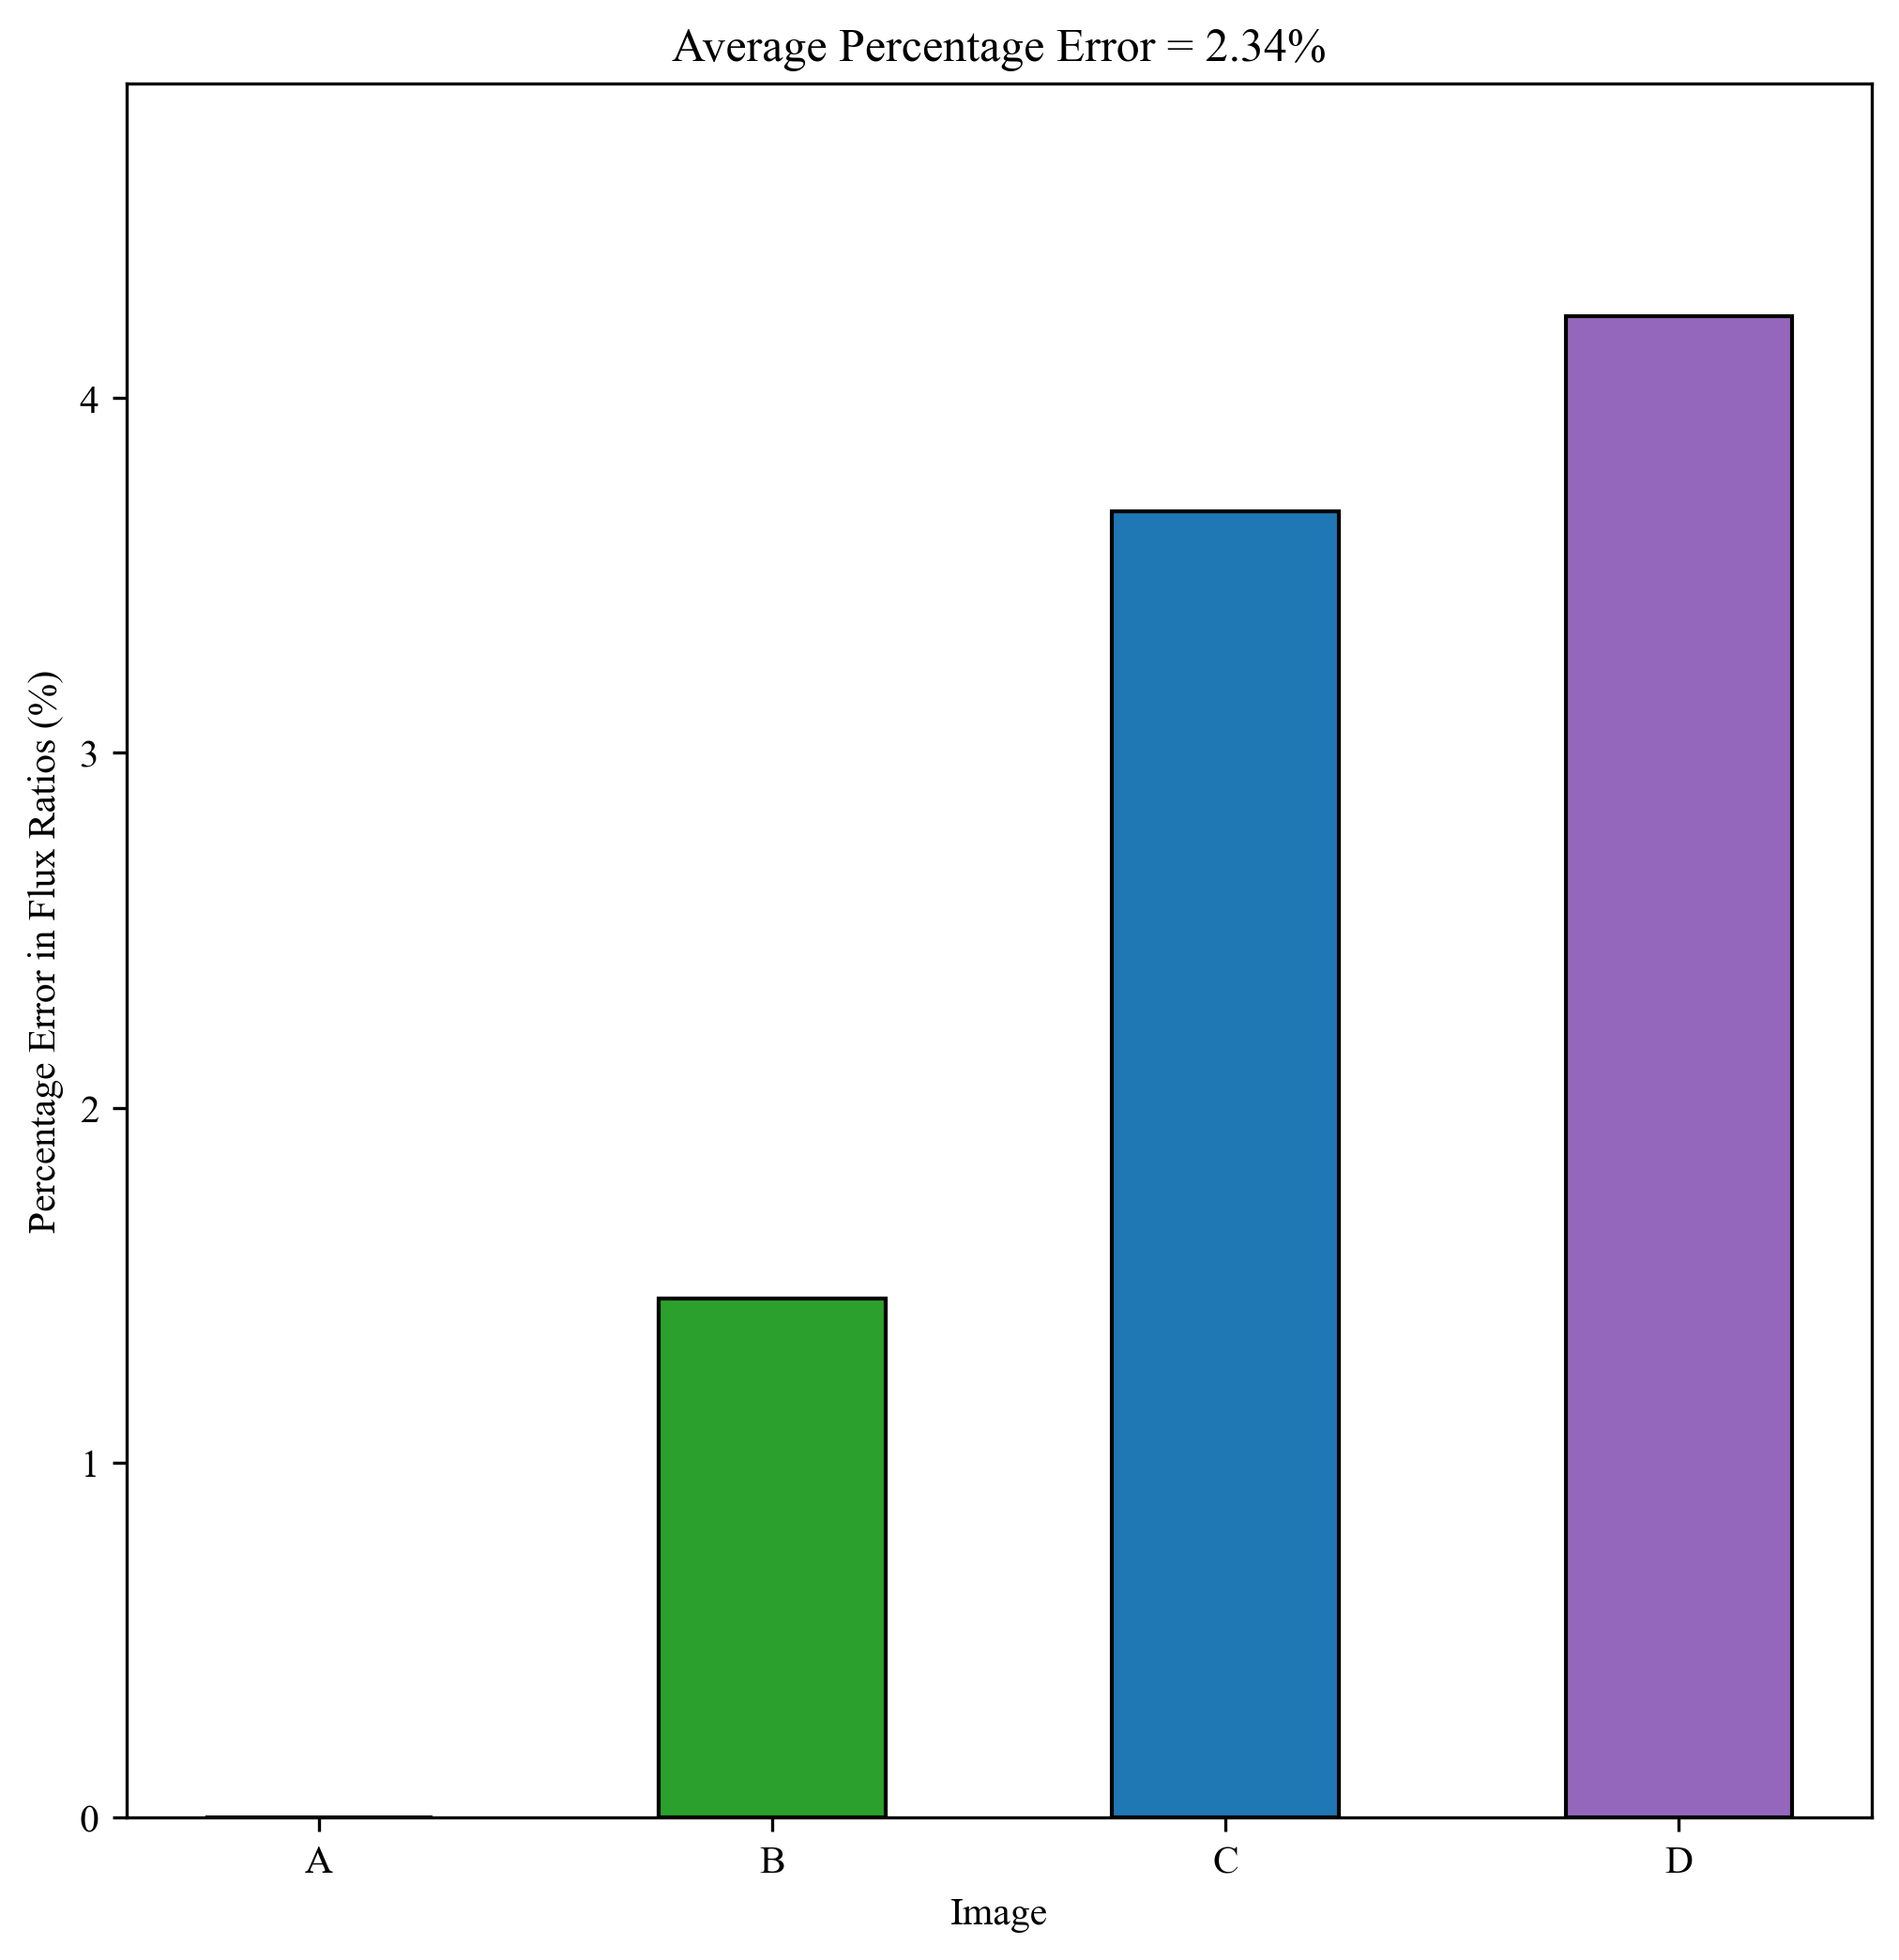

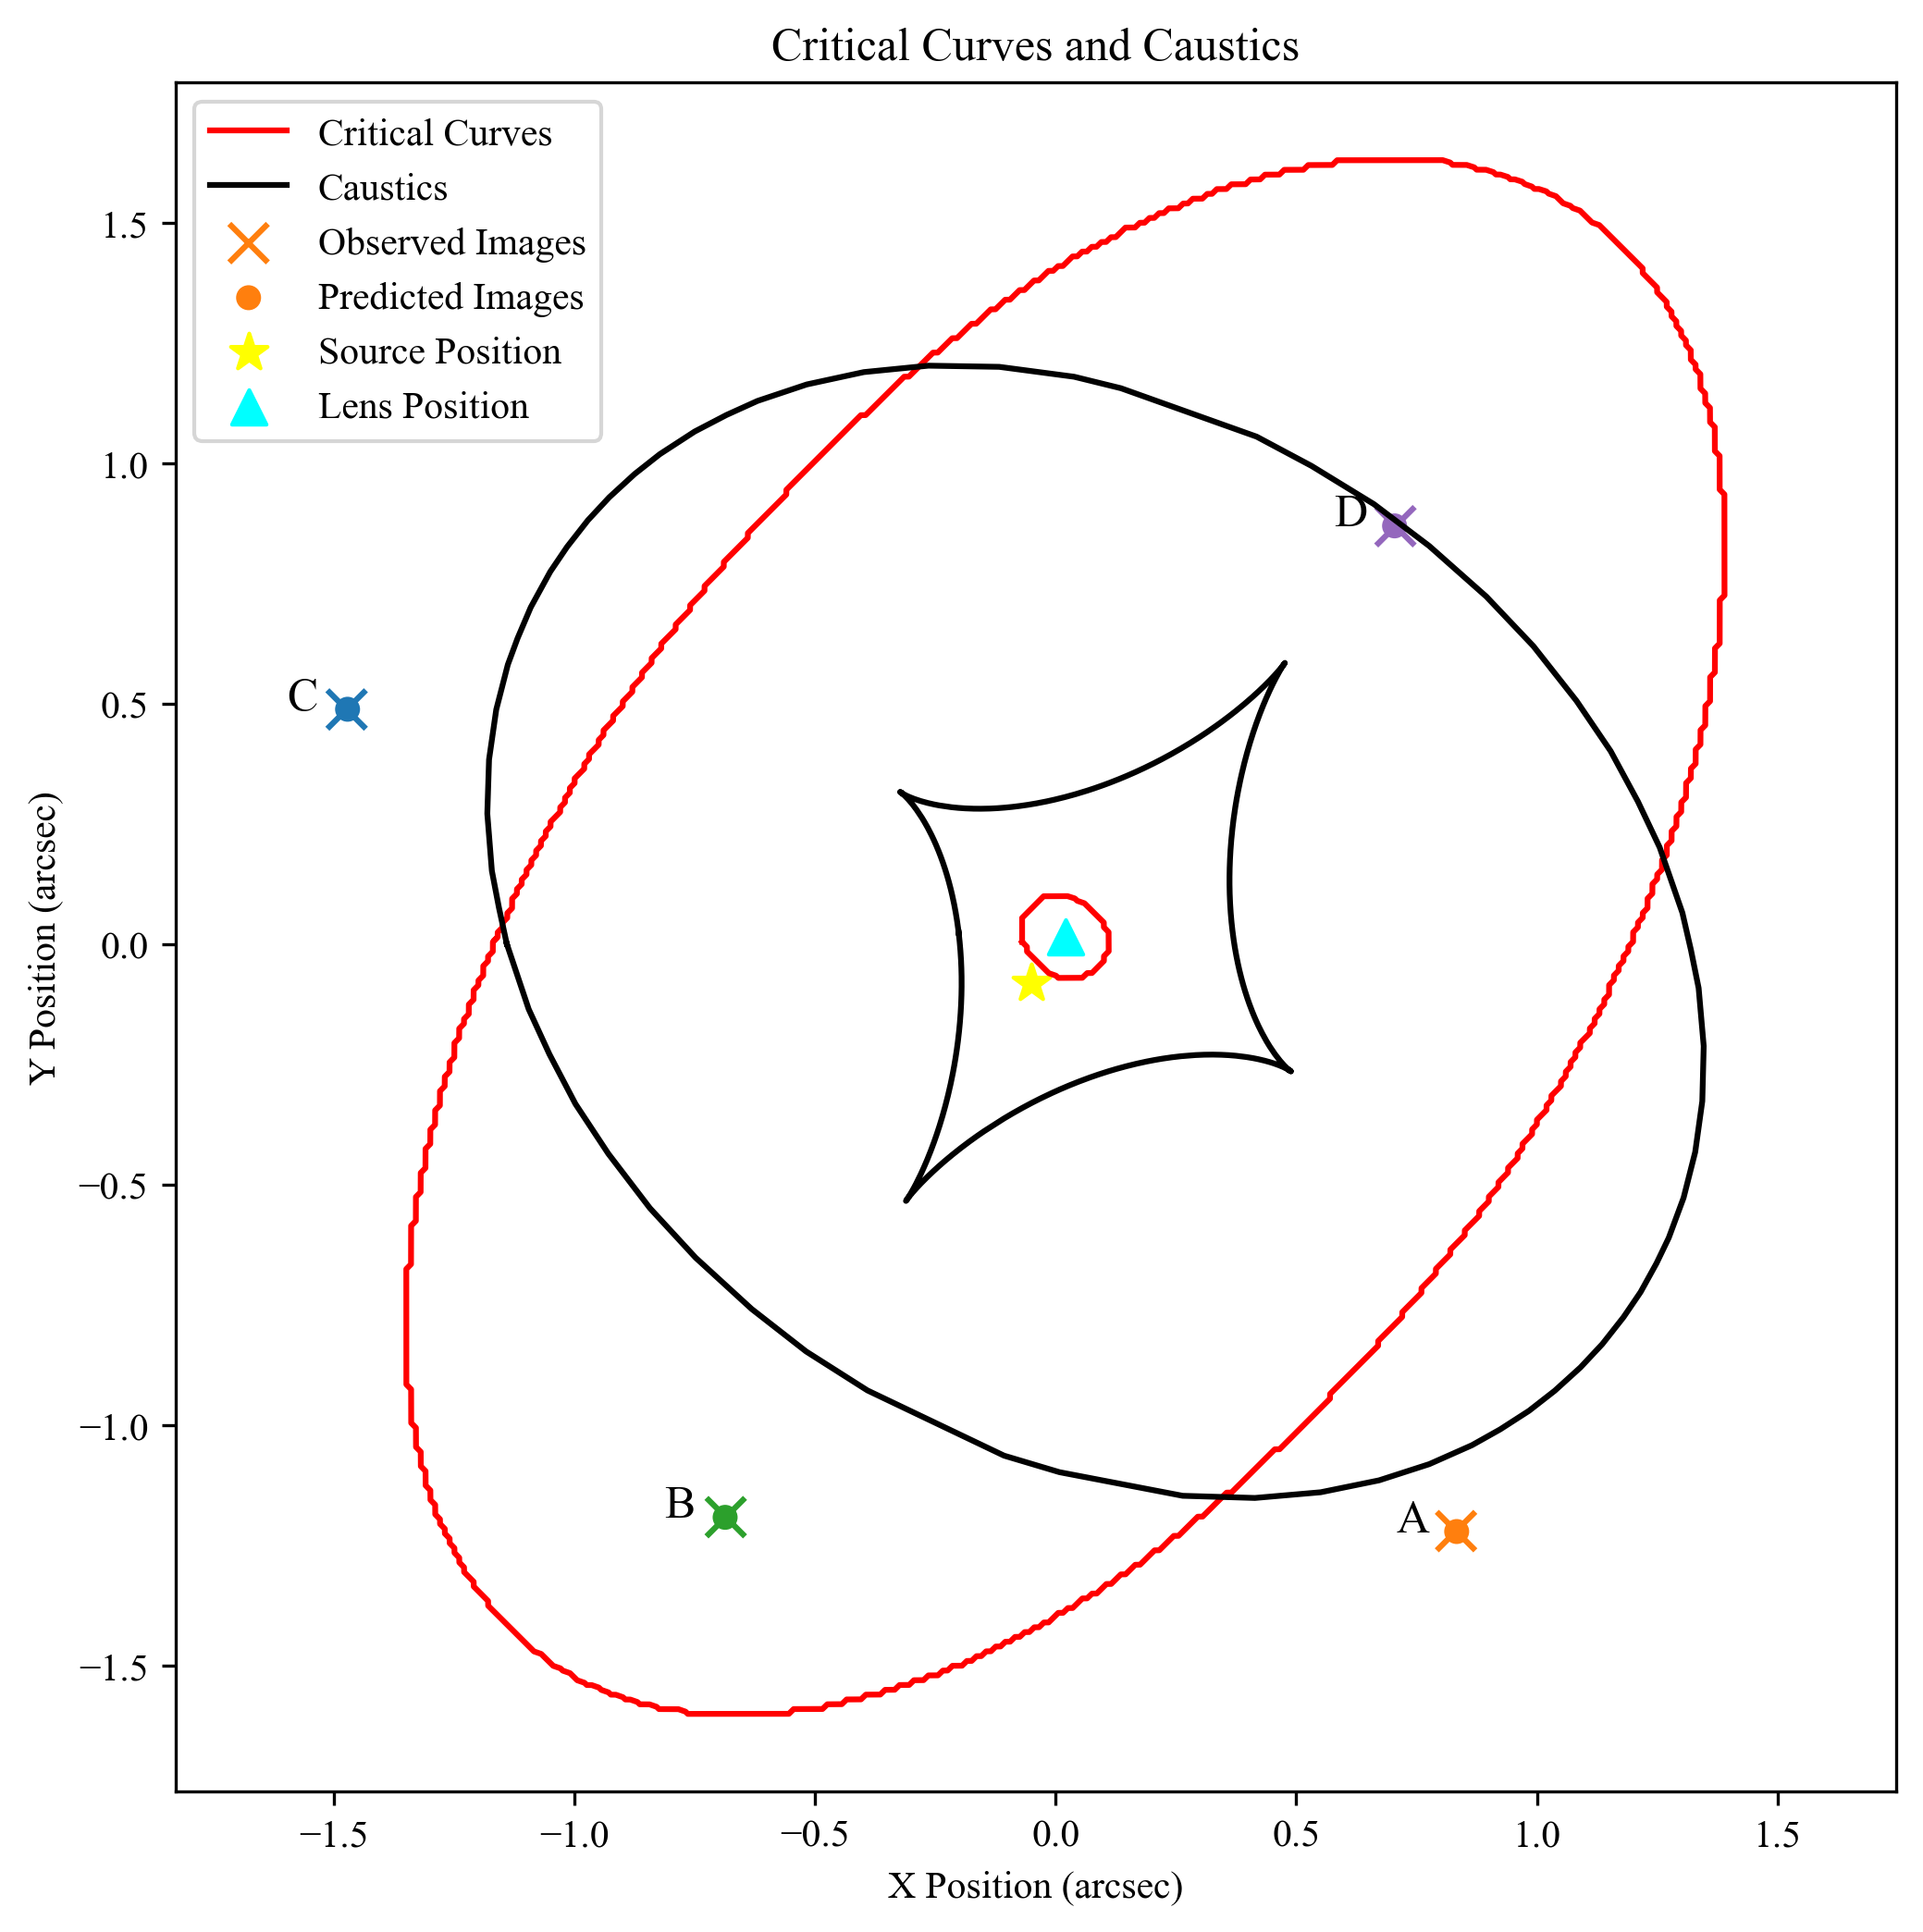

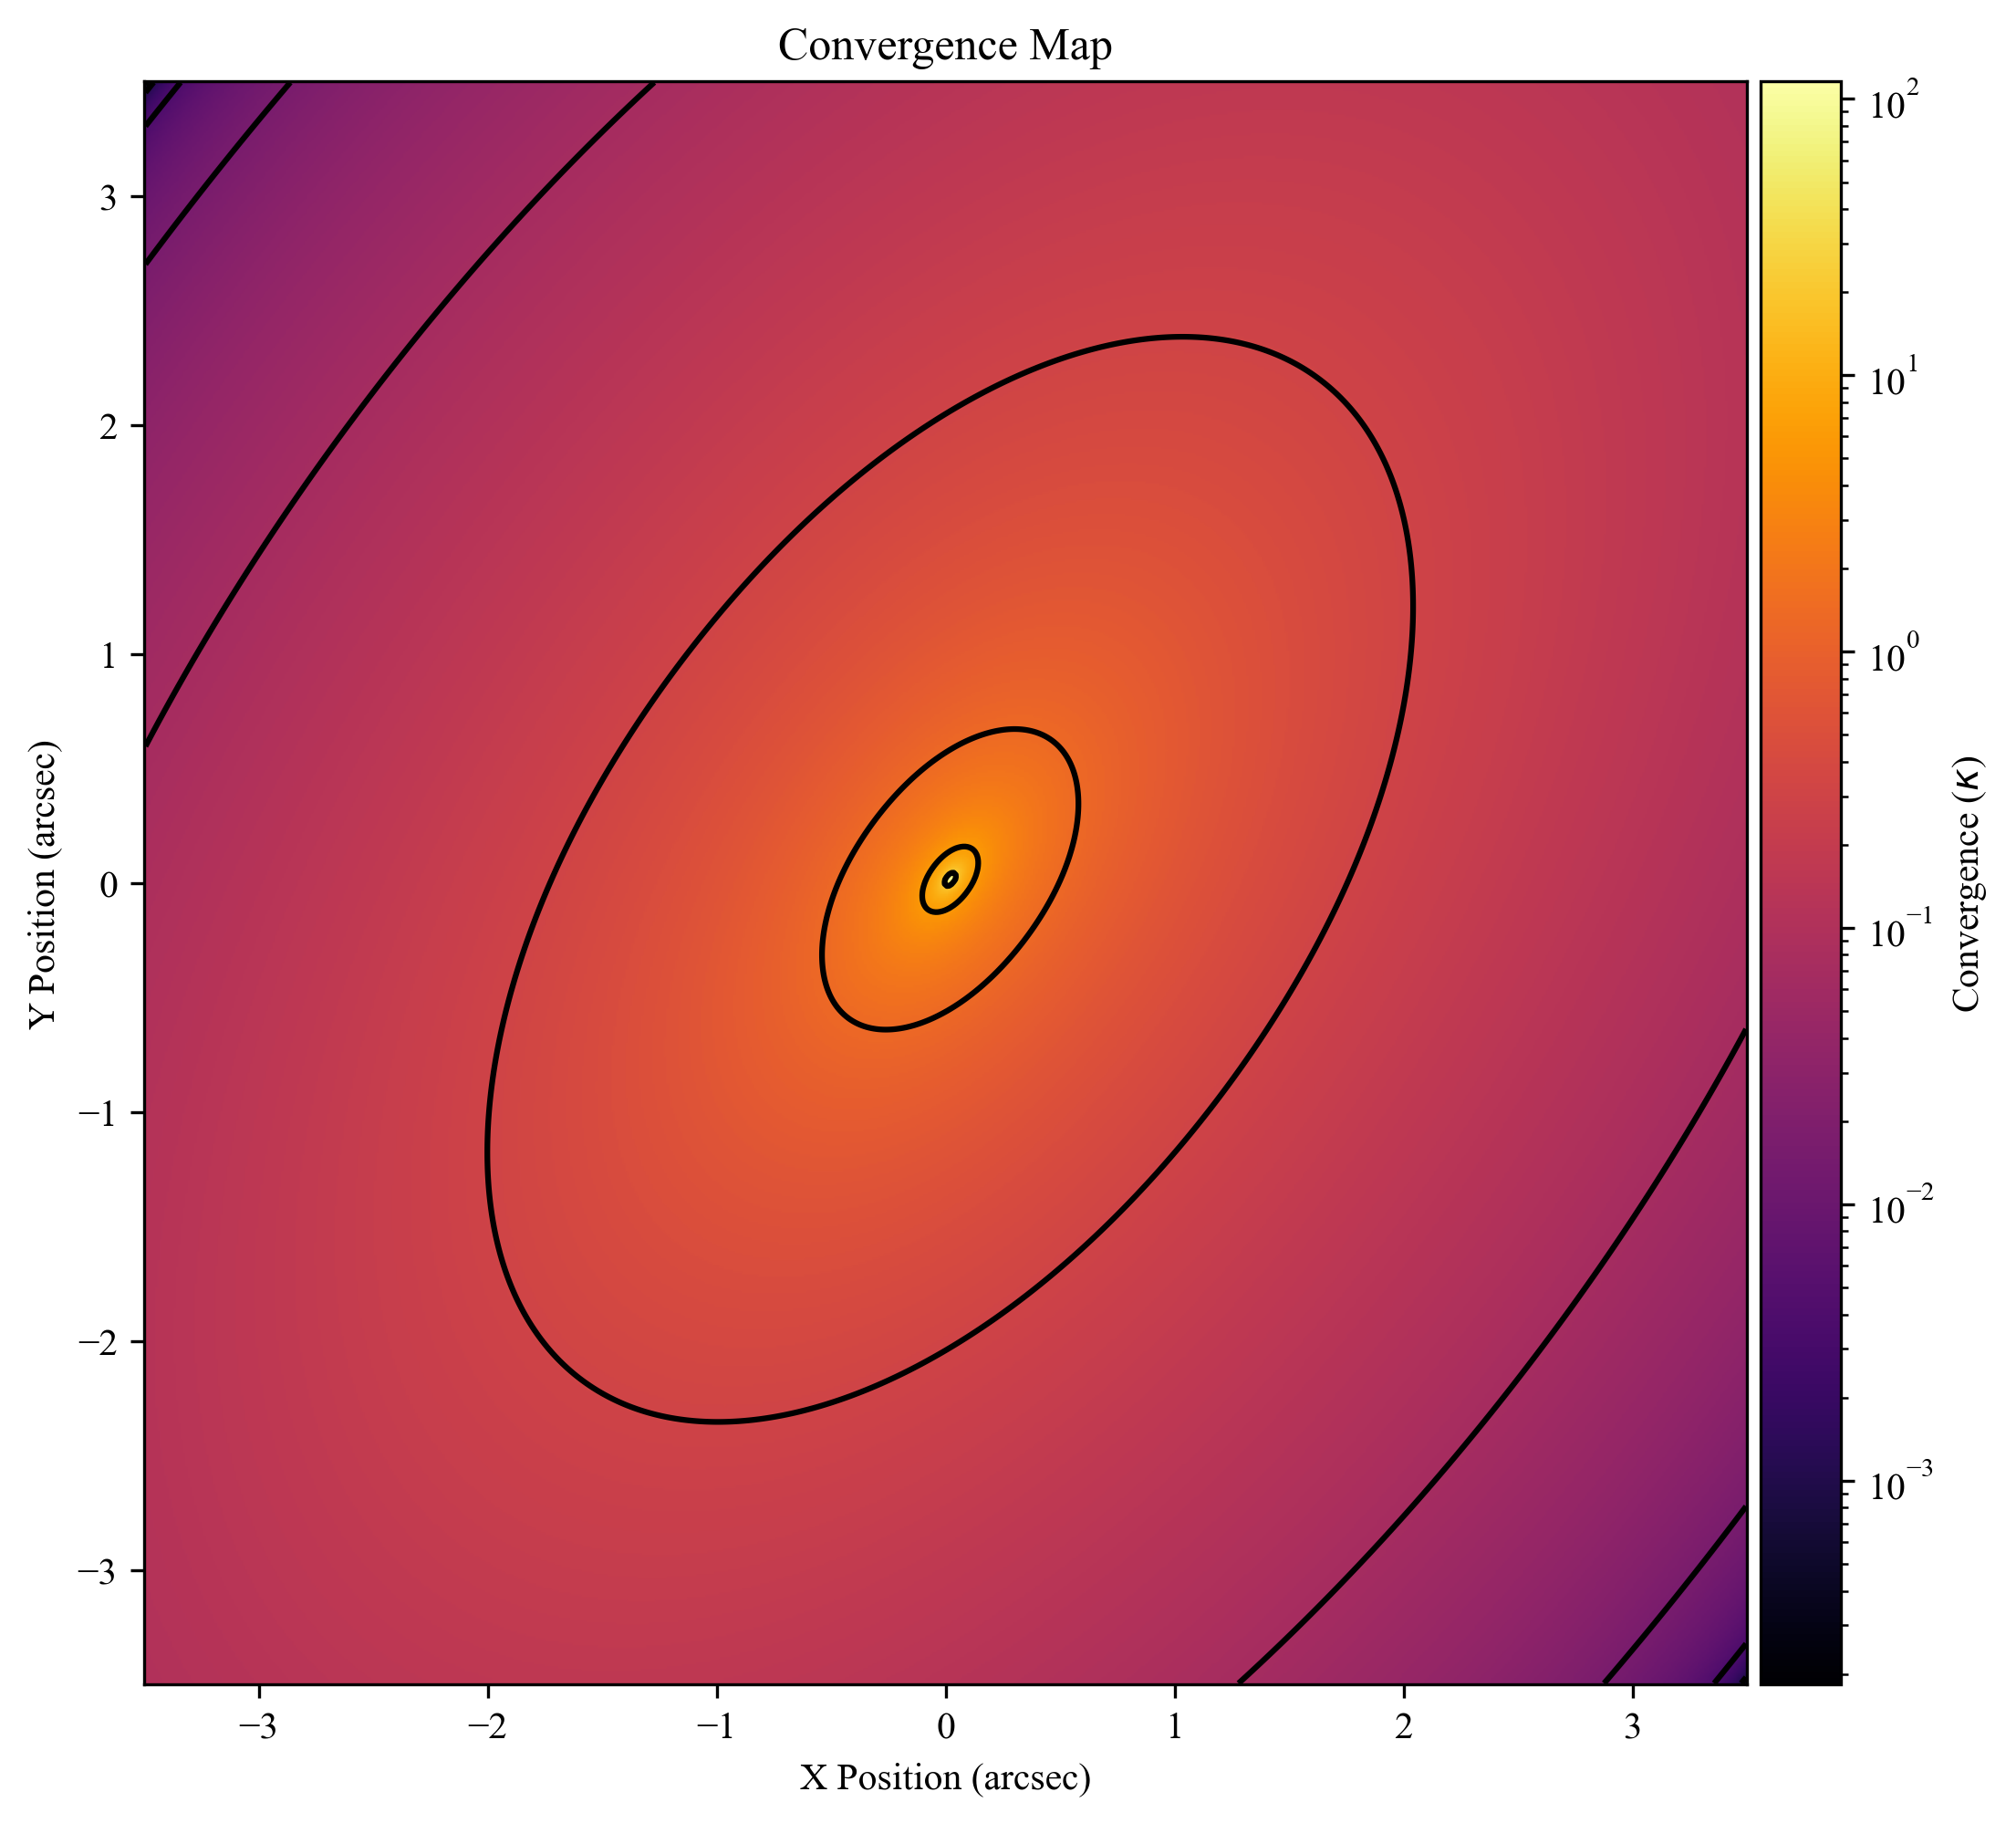

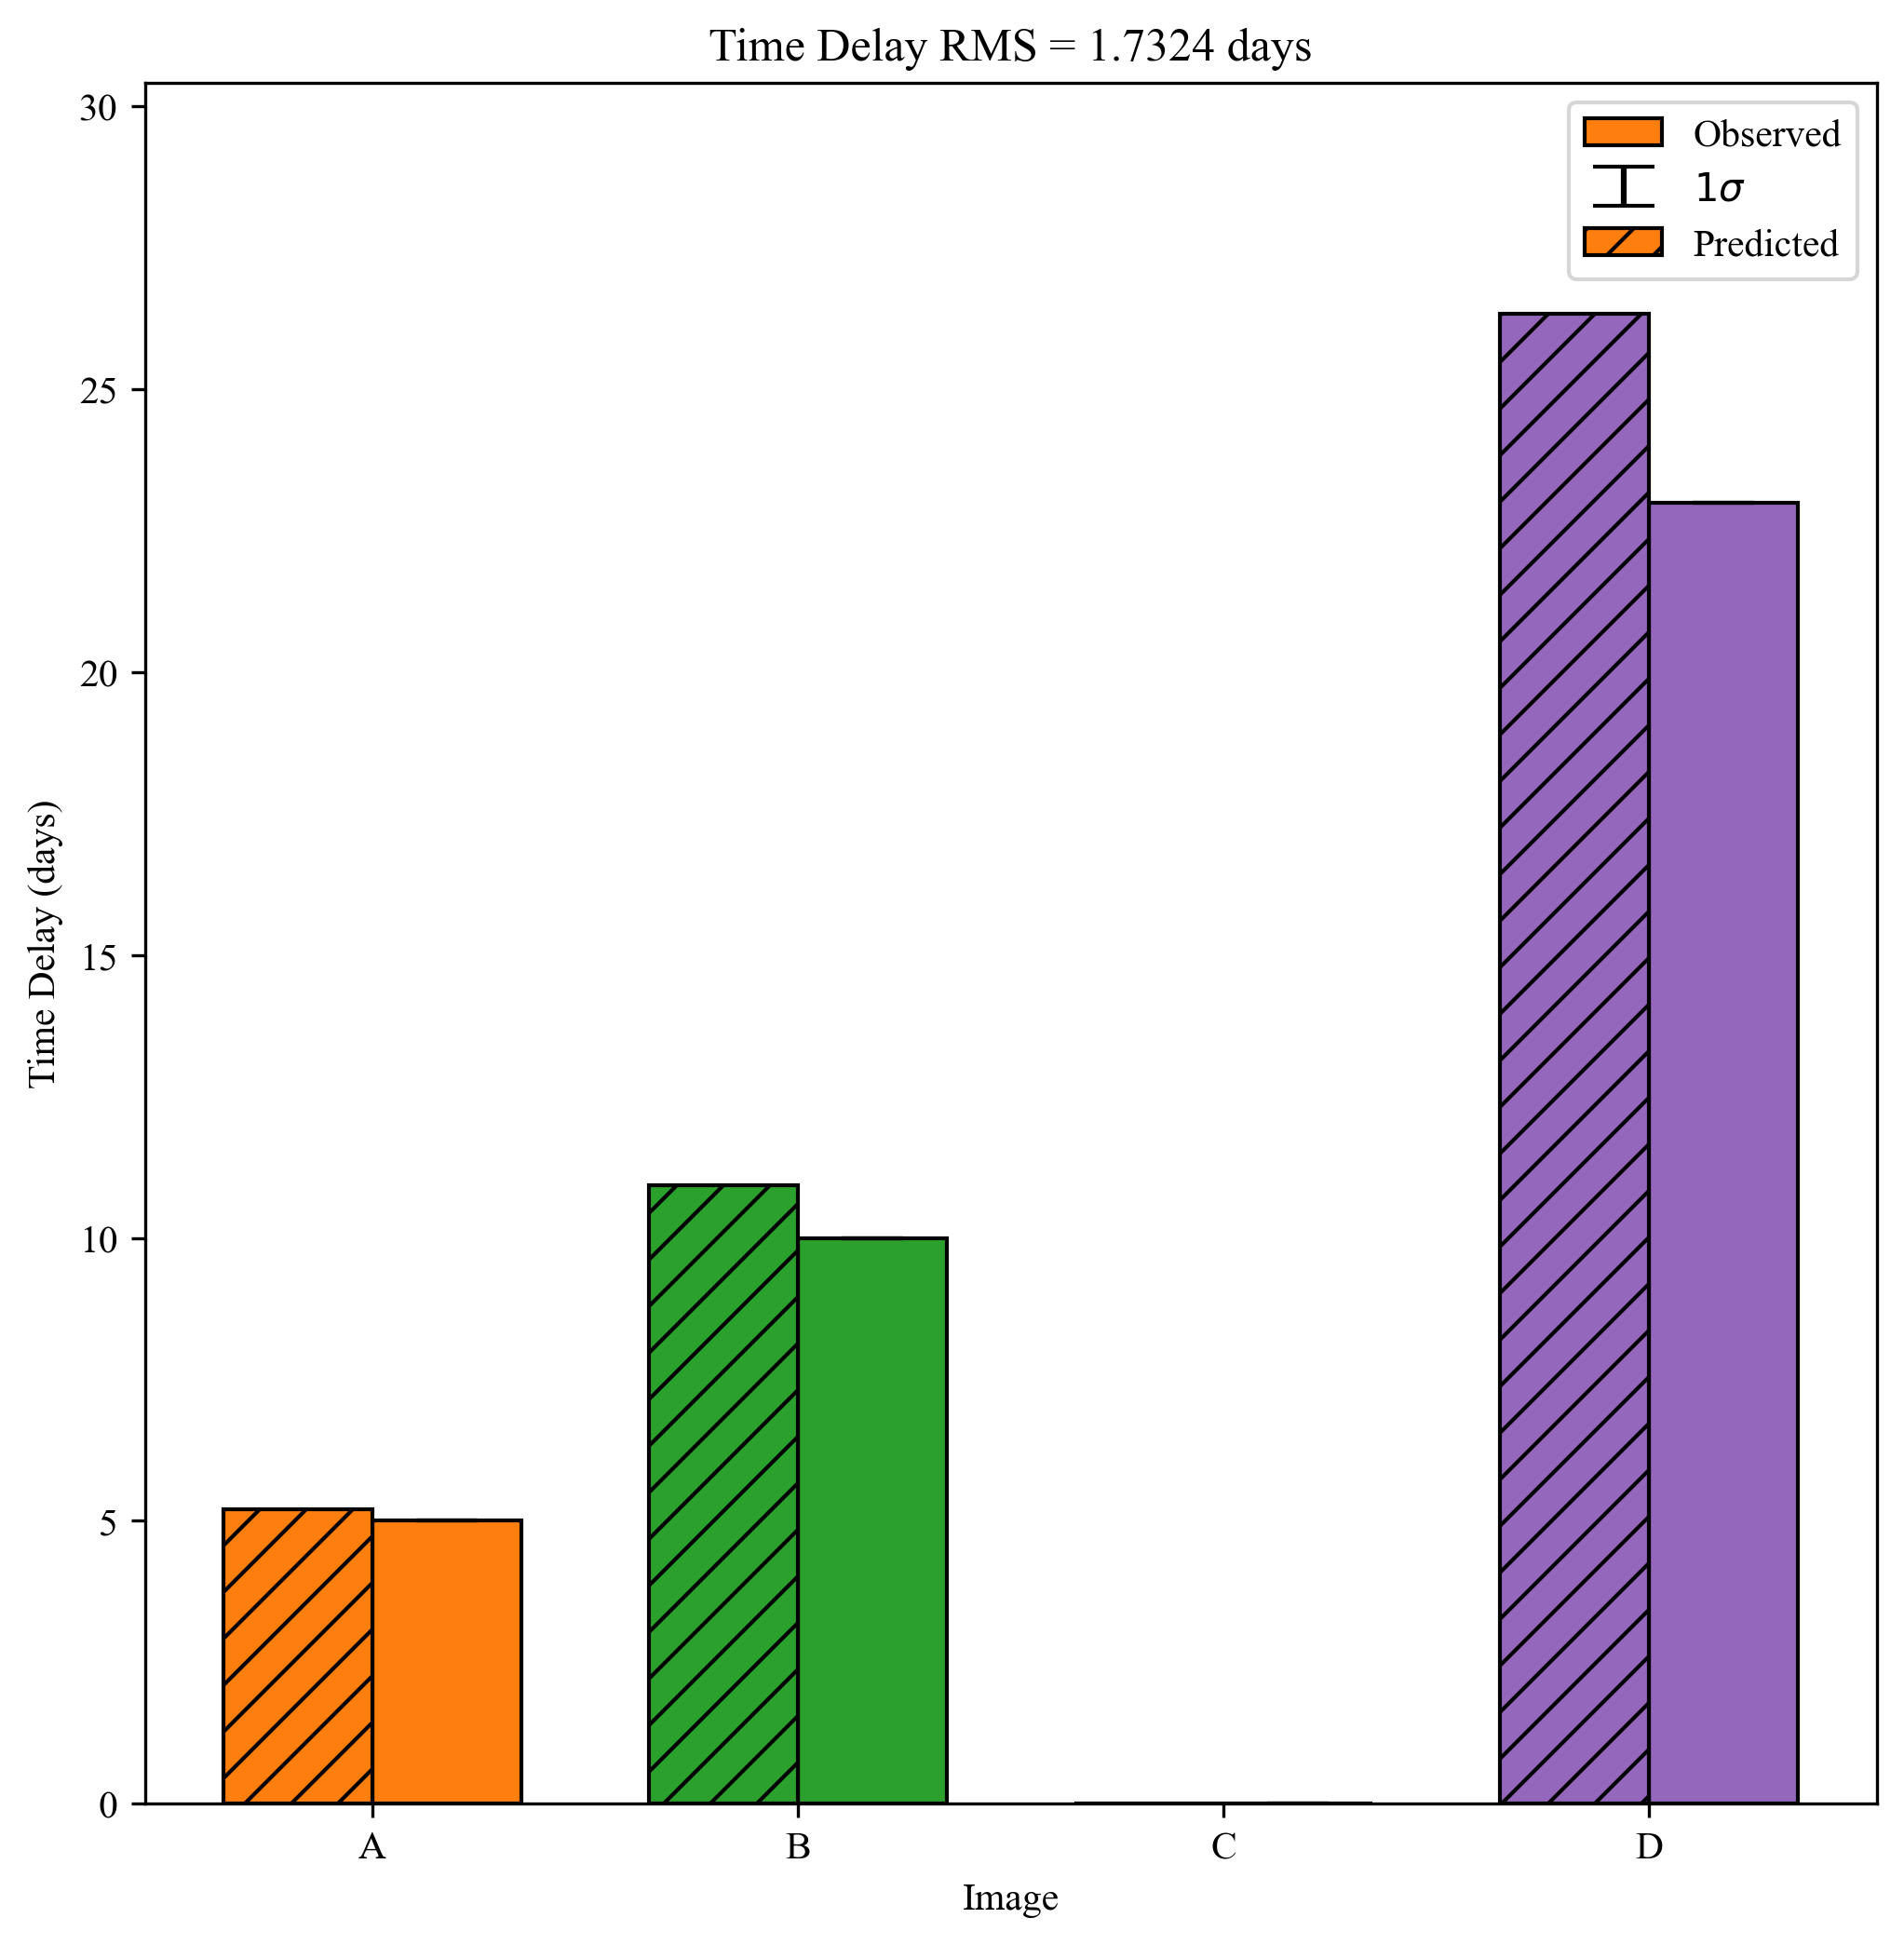

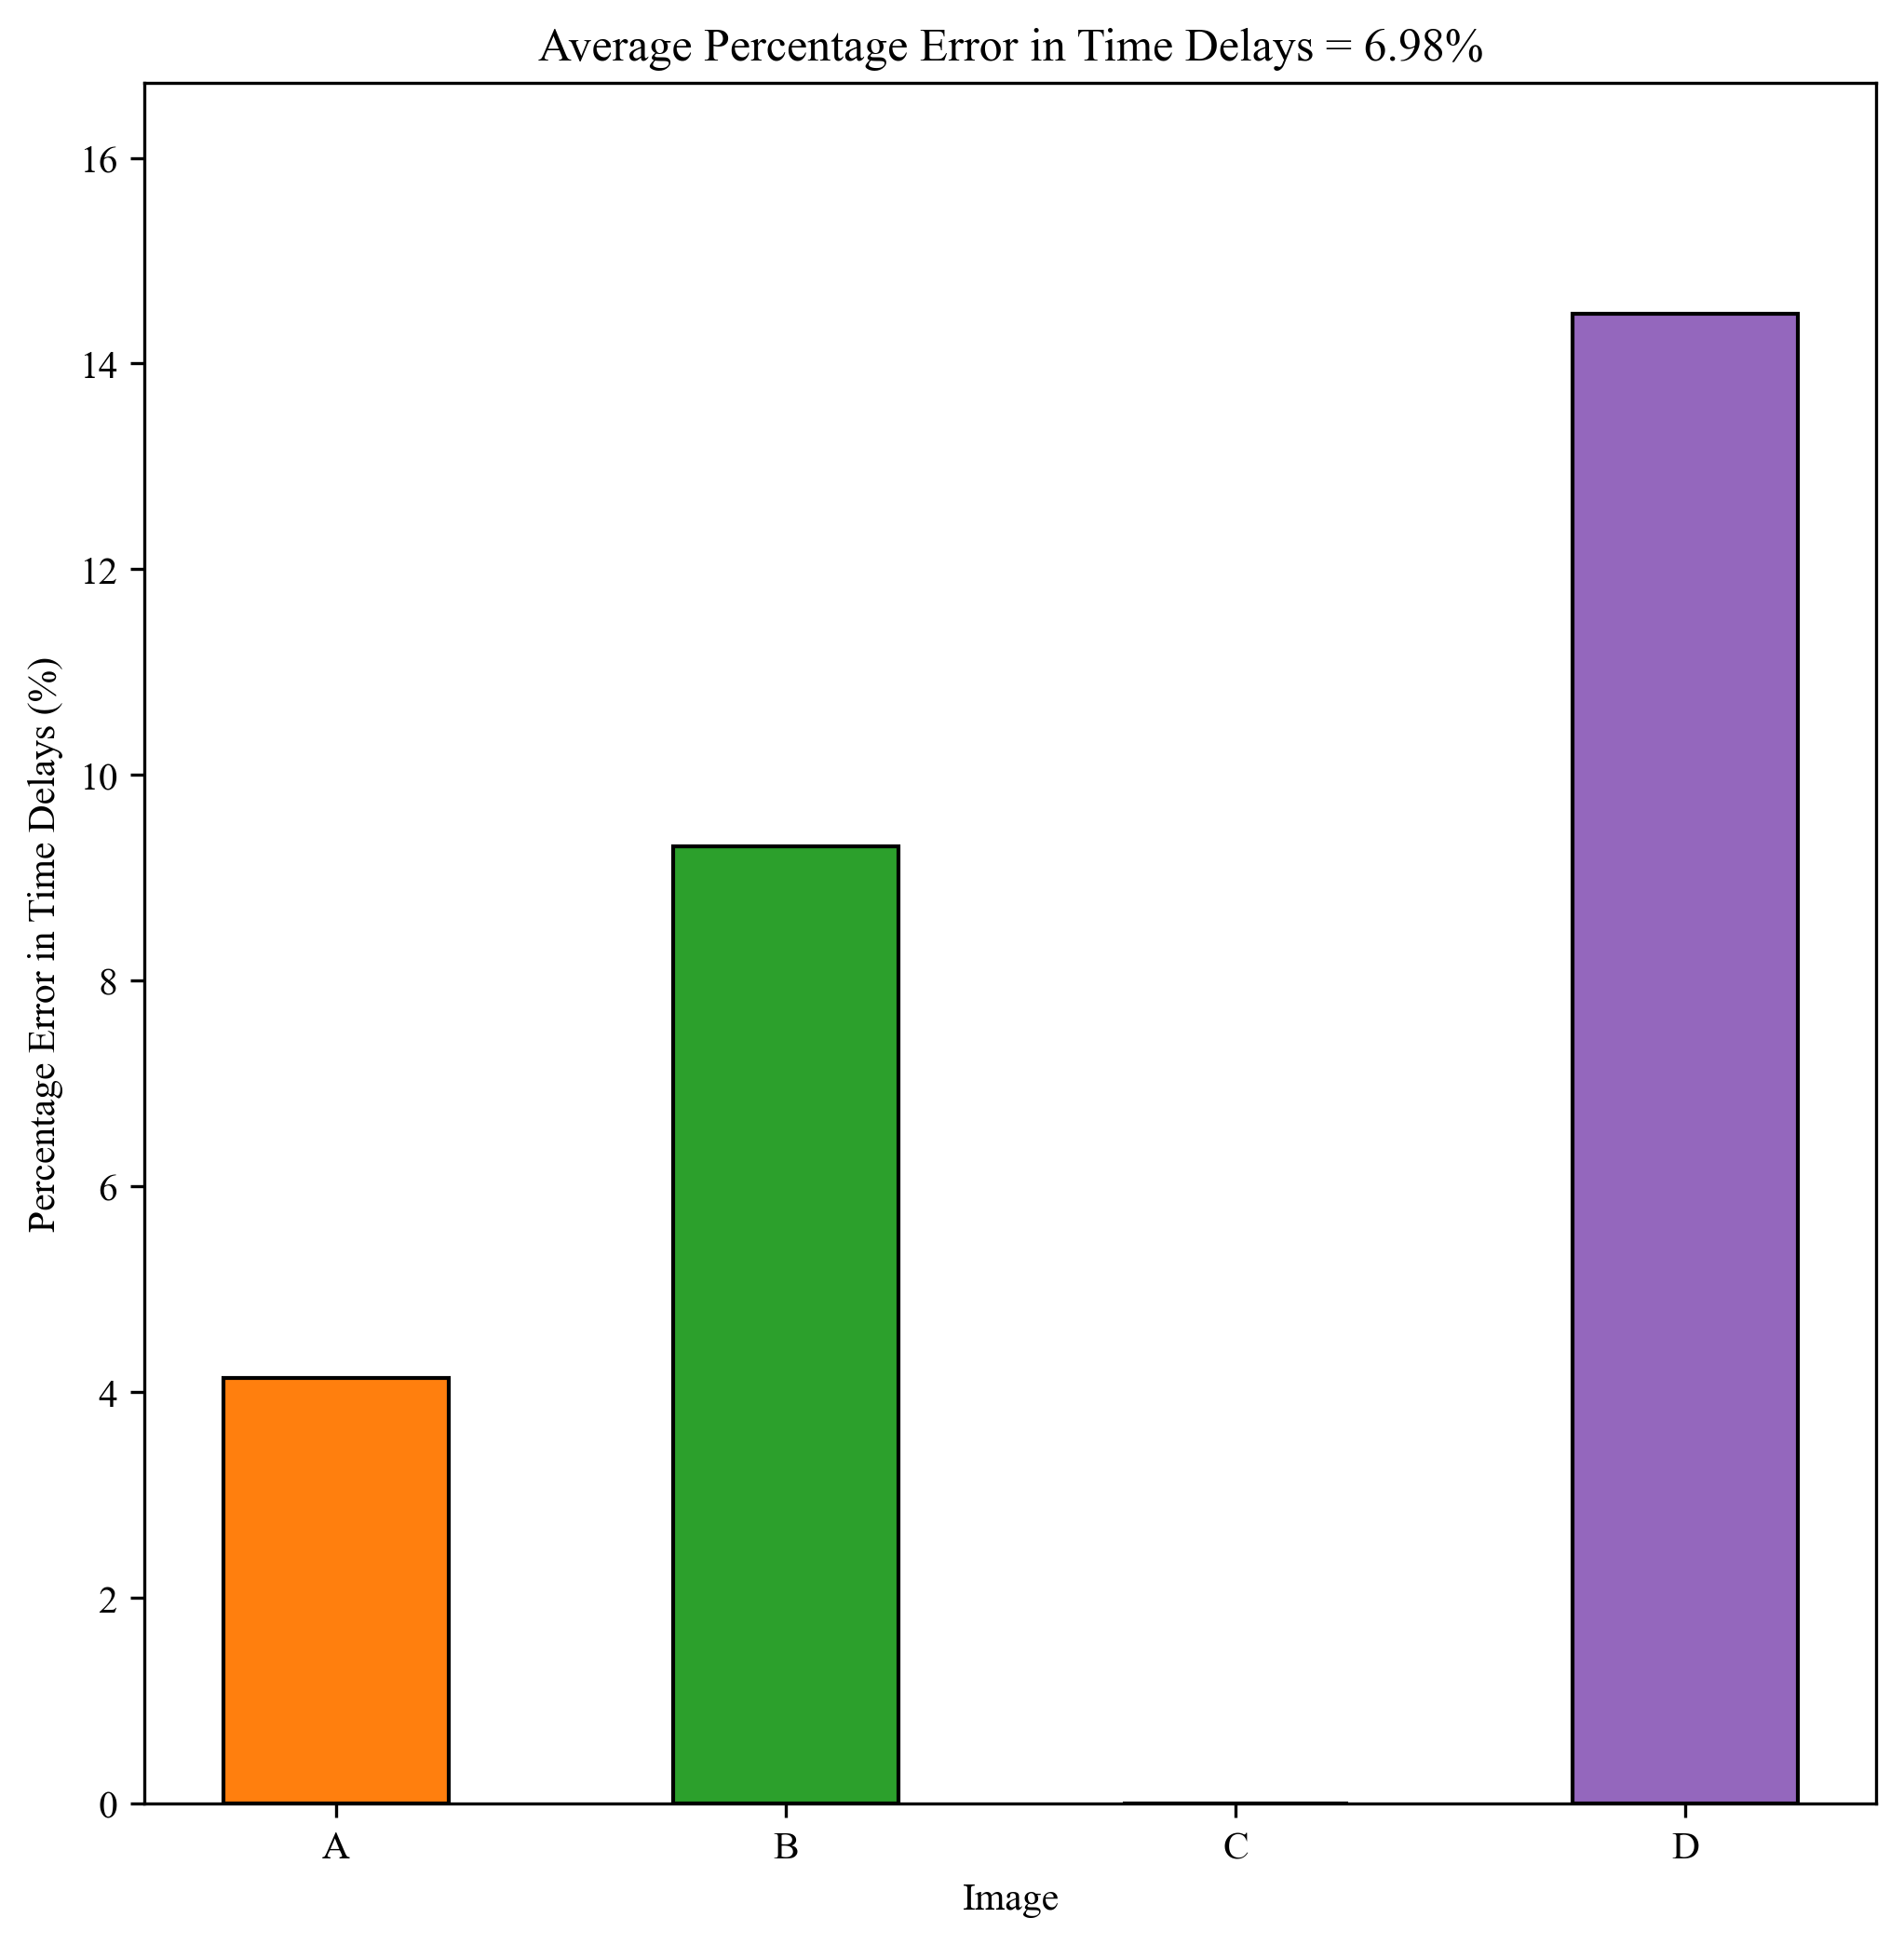

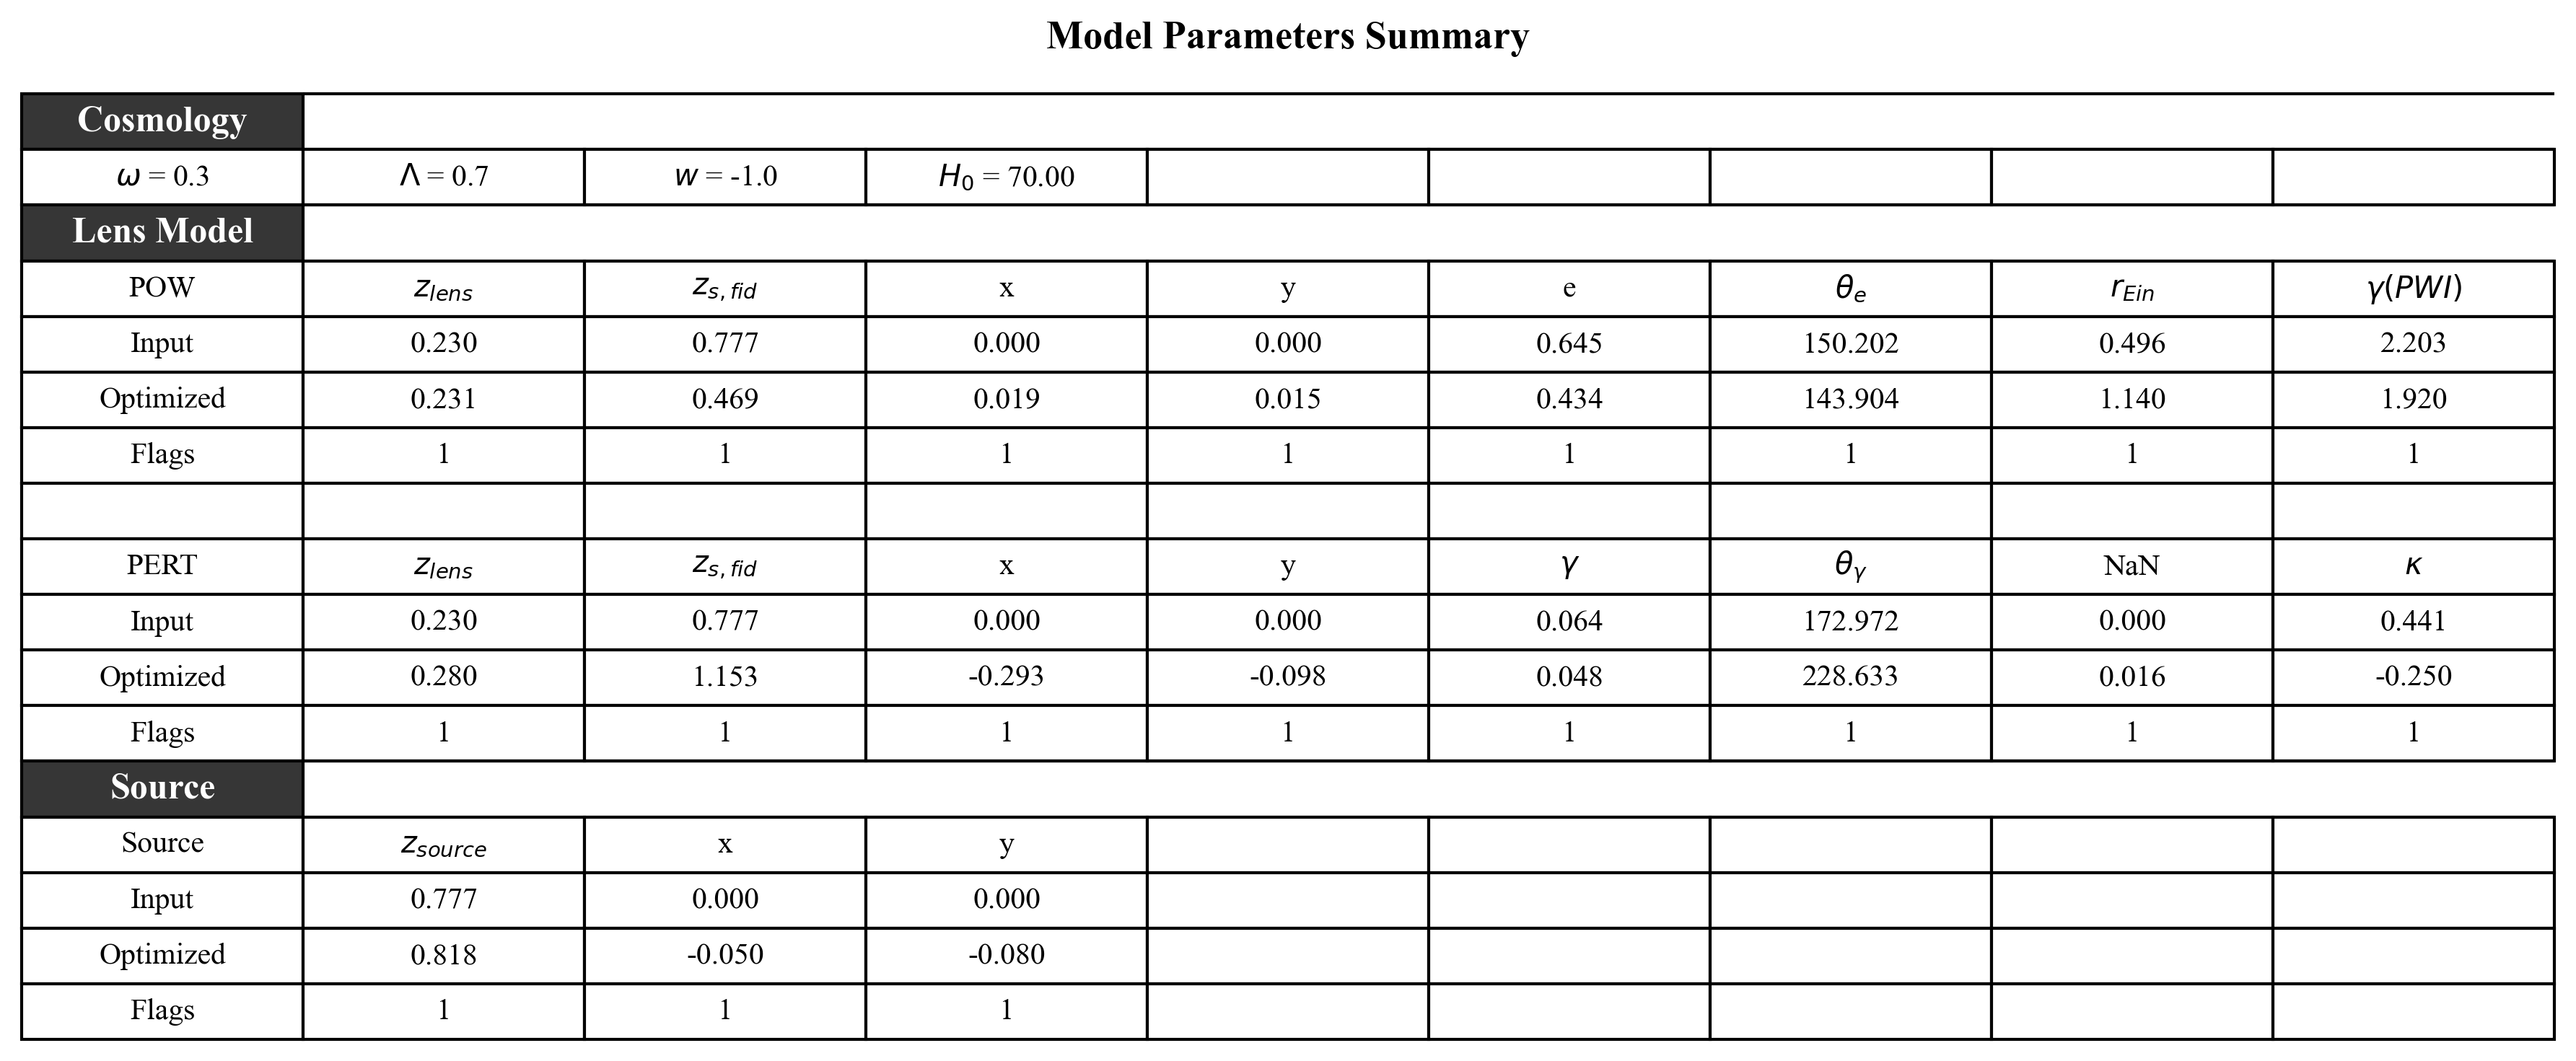

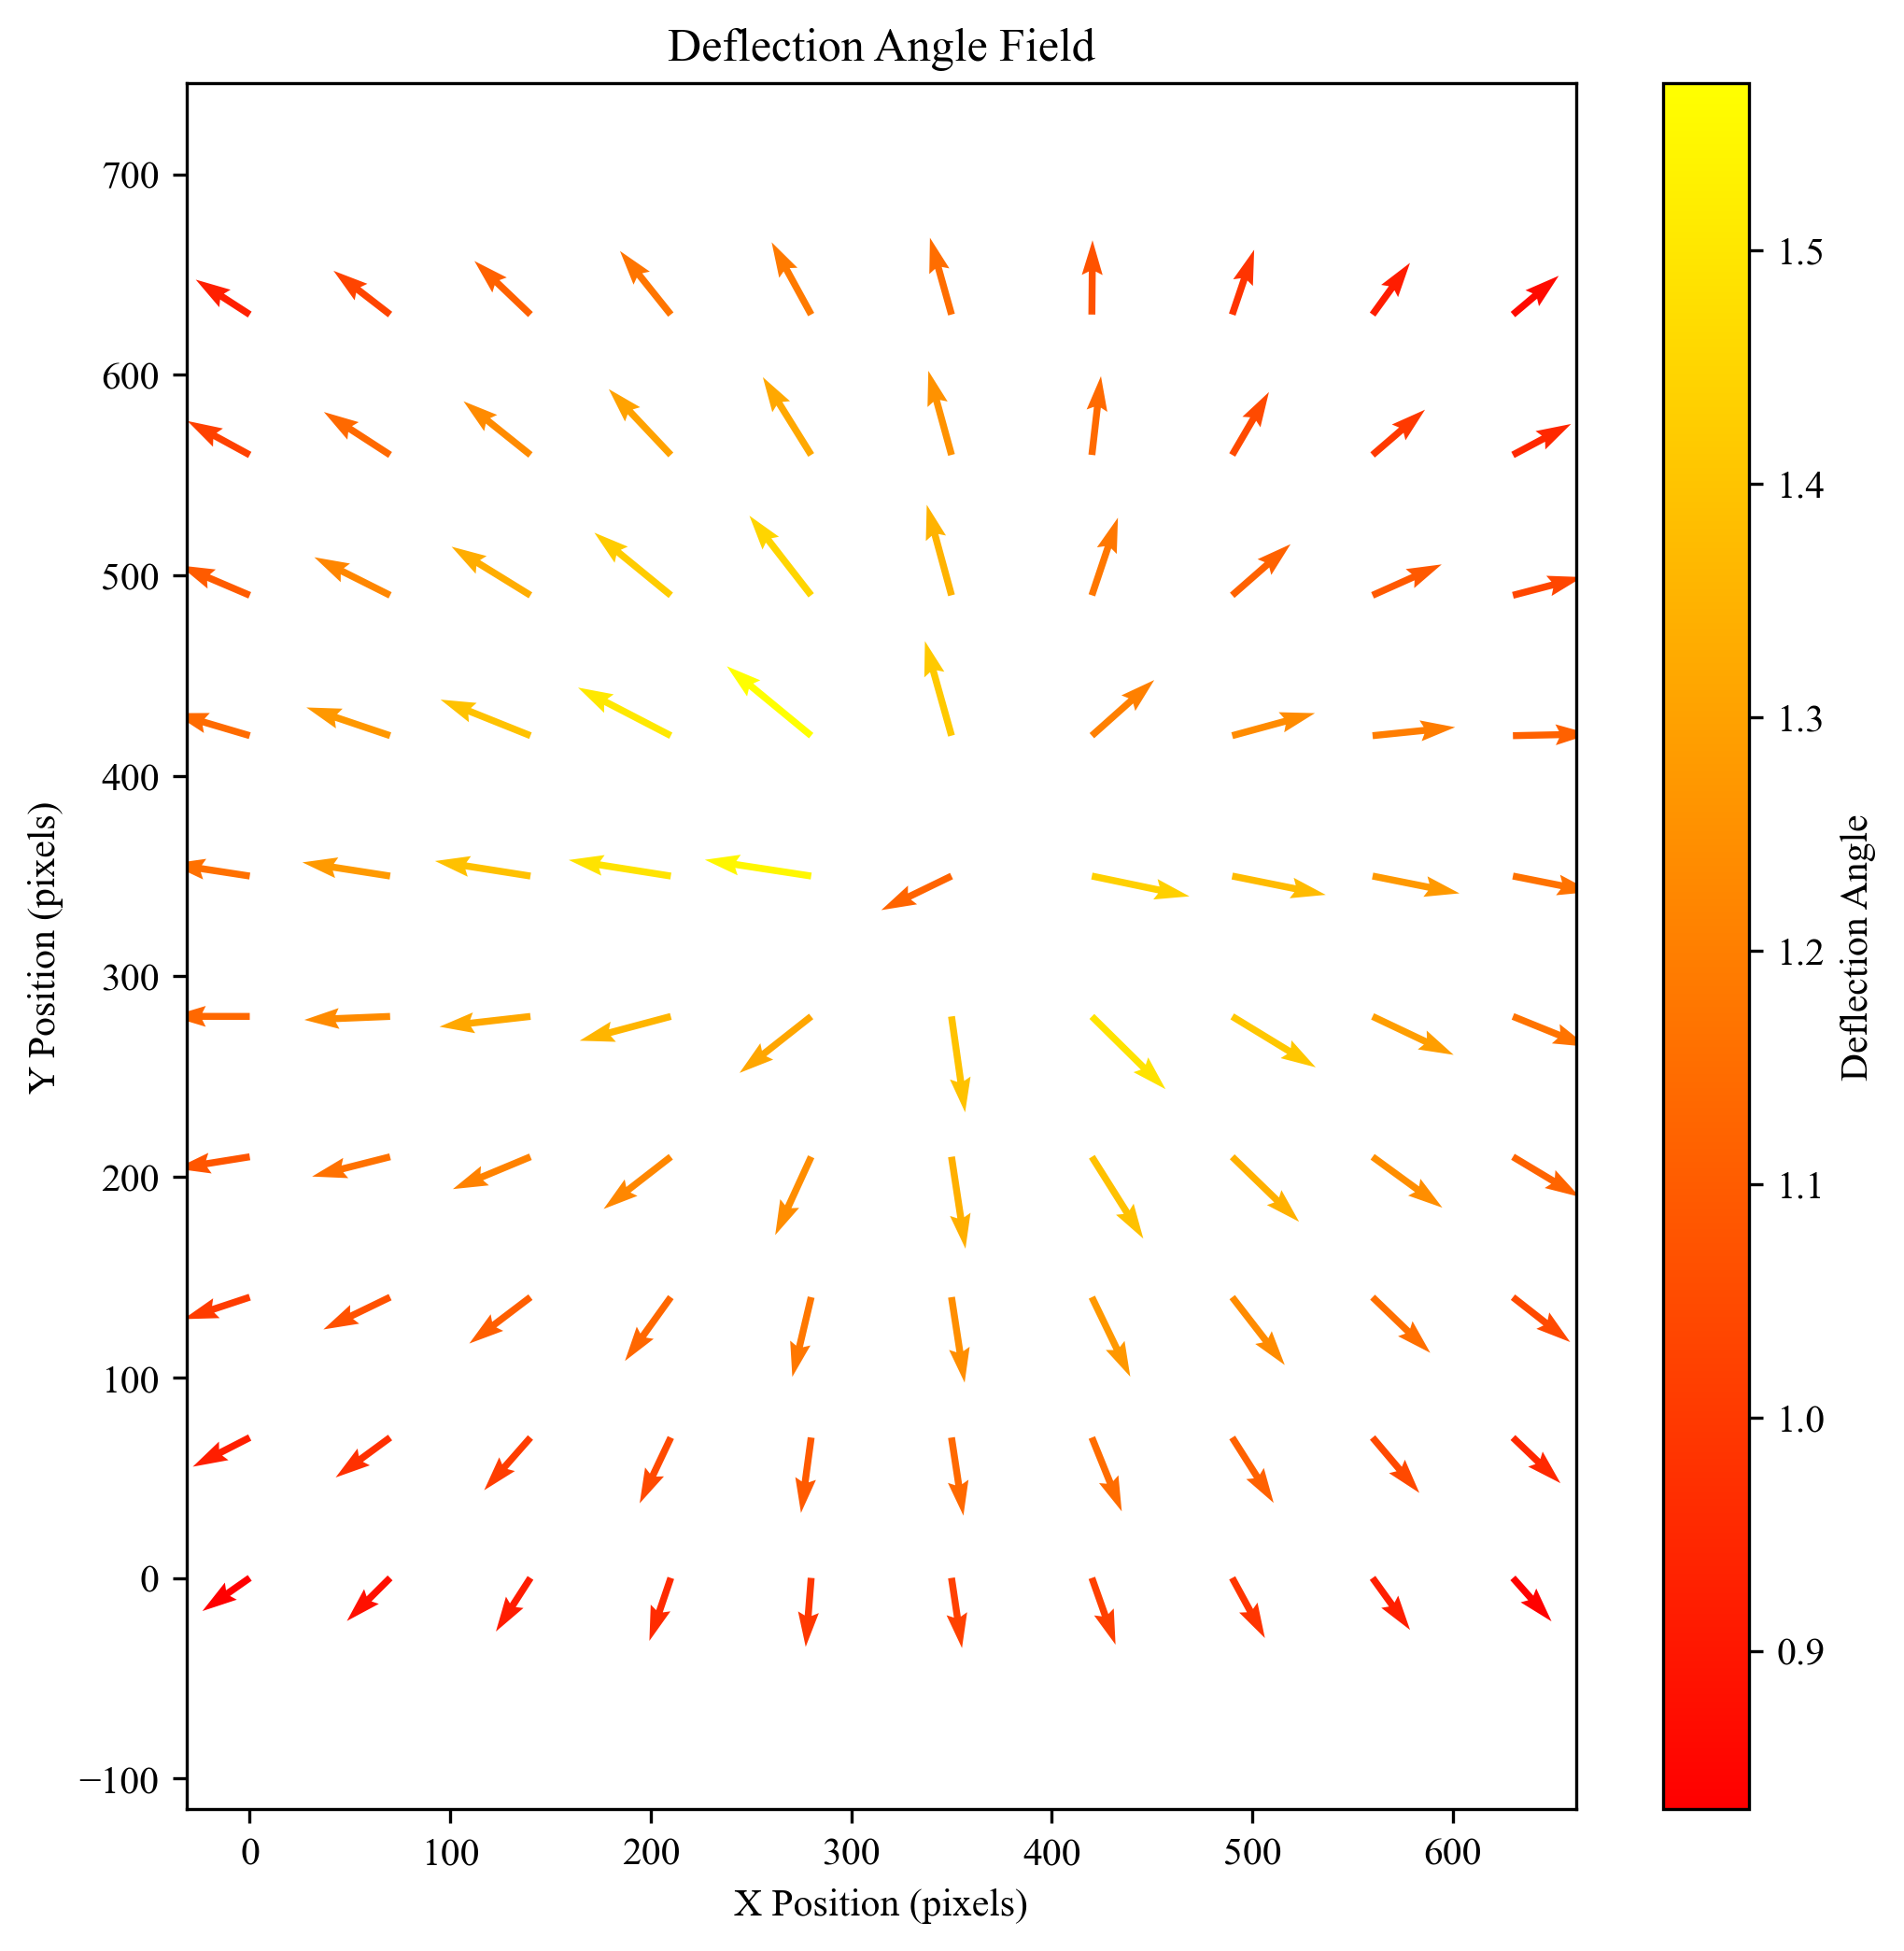

In [30]:
plotting(obs_point, pred_point, bkg='white')

In [109]:
# Plotting Functions

def plot_parameter_table(sections, precision=3, bkg='white', save_prefix=None, dpi=300):
    table_data = []
    header_indices = []
    data_indices = []

    for header, rows in sections:
        header_indices.append(len(table_data))
        table_data.append([header])
        
        start_index = len(table_data)
        data_indices.extend(range(start_index, start_index + len(rows)))

        # Re-round and sanitize numbers
        formatted_rows = []
        for row in rows:
            # Check if the row is a "Flags" row to avoid re-rounding
            if row and str(row[0]).strip().lower() == 'flags':
                formatted_rows.append([str(val) for val in row])
                continue

            formatted_row = []
            for val in row:
                try:
                    num = float(val)
                    if np.isnan(num):
                        formatted_row.append("NaN")
                    else:
                        formatted_row.append(f"{num:.{precision}f}")
                except (ValueError, TypeError):
                    formatted_row.append(str(val))
            formatted_rows.append(formatted_row)
        table_data.extend(formatted_rows)

    if not table_data:
        print("No data to plot.")
        return

    max_cols = max(len(row) for row in table_data)
    for row in table_data:
        row.extend([''] * (max_cols - len(row)))

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.axis('tight')
    ax.axis('off')

    the_table = ax.table(
        cellText=table_data,
        loc='center',
        cellLoc='left'
    )

    # --- Styling ---
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(1.1, 1.4)

    # Make the table fill the width evenly
    total_width = 1.0
    col_width = total_width / max_cols
    for j in range(max_cols):
        for i in range(len(table_data)):
            the_table[(i, j)].set_width(col_width)

    # --- Header styling ---
    for header_idx in header_indices:
        for j in range(max_cols):
            cell = the_table[(header_idx, j)]
            cell.set_facecolor("#434343" if bkg == 'white' else "#ffffff")
            cell.set_text_props(weight='bold', color='black' if bkg == 'black' else 'white', ha='center', fontsize=12)
            cell.visible_edges = "horizontal"
        the_table[(header_idx, 0)].visible_edges = "closed"

    # --- Data row styling ---
    for data_idx in data_indices:
        for j in range(max_cols):
            cell = the_table[(data_idx, j)]
            text = cell.get_text().get_text()
            cell.set_facecolor('white' if bkg == 'white' else '#2e2e2e')
            cell.set_text_props(color='black' if bkg == 'white' else 'white', fontsize=10)
            # Make model header rows a different color for the entire row
            first_cell_text = ''
            try:
                first_cell_text = the_table[(data_idx, 0)].get_text().get_text()
            except Exception:
                first_cell_text = table_data[data_idx][0] if table_data and len(table_data) > data_idx else ''

            if str(first_cell_text).strip() not in ['Input', 'Optimized', 'Flags', '']:
                cell.set_facecolor("#b9b9b9" if bkg == 'white' else "#5f5f5f")
                cell.set_text_props(weight='bold')
            try:
                float(text)
                cell._text.set_ha('center')
            except ValueError:
                cell._text.set_ha('center')

    plt.title("Model Parameters Summary", pad=20, fontsize=13, weight='bold')
    plt.tight_layout()
    plt.savefig(f'Plots/{save_prefix}_model_parameters_table.png', dpi=dpi, bbox_inches='tight') if save_prefix else None
    plt.show()

def _setup_plot_style(bkg):
    if bkg == 'black':
        plt.style.use('dark_background')
        plt.rcParams.update({'axes.facecolor': 'black', 'figure.facecolor': 'black'})
    else:
        plt.style.use('default')
        plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["figure.dpi"] = 300

def plotting(obs_point, pred_point, bkg='white', posrms=False, fluxrms=False, fluxpercent=False, critcurves=False, kappamap=False, timedelays=False, timedelaypercent=False, deflectionfield=False, table=False,
             save_prefix=None, dpi=300,
             pos_rms_value=0.0, flux_rms_value=0.0, avg_percentage_error=0.0, usemag=0, mag_ratio=0, flux_obs_pos=0,
             xi_interp_inner=None, yi_interp_inner=None, xi_interp_outer=None, yi_interp_outer=None,
             xs_interp_inner=None, ys_interp_inner=None, xs_interp_outer=None, ys_interp_outer=None,
             source_params=None, lens_params=None, kappa=None, x_low=0, x_up=1, y_low=0, y_up=1,
             constraints=[], td_rms=0.0, avg_percentage_error_td=0.0, sections_to_plot=None,
             Xs=None, Ys=None, Us=None, Vs=None, alphas=None):

    # Plotting Coefficients
    scaling = 0.1
    text_scaling = 0.04
    num_obs_images = len(obs_point)
    bar_width = 0.4 if num_obs_images < 4 else 0.5

    # --- 1. Position RMS ---
    if posrms:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 6))
        bar_container = ax.bar(pred_point['Img'], pred_point['pos_rms'], color=pred_point['Color'], width=bar_width, edgecolor='black' if bkg == 'white' else 'white')
        legend_label_added = False
        for i, bar_patch in enumerate(bar_container.patches):
            img_name = pred_point['Img'].iloc[i]
            obs_error_for_img = obs_point.loc[obs_point['Img'] == img_name, 'pos_err'].values[0]
            ax_left, ax_right = ax.get_xlim()
            bar_left, bar_right = bar_patch.get_x(), bar_patch.get_x() + bar_patch.get_width()
            xmin_rel, xmax_rel = (bar_left - ax_left) / (ax_right - ax_left), (bar_right - ax_left) / (ax_right - ax_left)
            label = "" if legend_label_added else '$1 \sigma$'
            legend_label_added = True
            ax.axhline(y=obs_error_for_img, xmin=xmin_rel, xmax=xmax_rel, color='r', linestyle='--', linewidth=2, label=label)
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
        ax.set_xlabel('Image'); ax.set_ylabel('Position Offset')
        if legend_label_added:
            ax.legend(fontsize='small')
        ax.set_title(f'Position RMS = {pos_rms_value:.4f}"')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_position_rms.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 2. Magnification/Relative Flux ---
    if fluxrms:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 6))
        x = np.arange(len(obs_point['Img']))
        obs_img_list = list(obs_point['Img'])
        pred_indices = [obs_img_list.index(img) for img in pred_point['Img']]
        width = 0.3 if num_obs_images < 4 else 0.35
        ax.bar(x + width/2, obs_point['mag'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
        ax.errorbar(x + width/2, obs_point['mag'], yerr=obs_point['mag_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
        ax.bar(np.array(pred_indices) - width/2, pred_point['mag'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
        ax.set_xticks(x); ax.set_xticklabels(obs_point['Img'])
        ax.legend(fontsize='small')
        ax.set_xlabel('Image')
        if usemag == 0:
            ax.set_ylabel('Flux Ratios'); ax.set_title(f'Flux Ratio RMS = {flux_rms_value:.4f}')
            ax.set_title(f'Flux Ratio RMS = {flux_rms_value:.4f}')
        elif usemag == 1 and mag_ratio == 1:
            ax.set_ylabel('Absolute Magnification Ratios'); ax.set_title(f'Absolute Magnification Ratio RMS = {flux_rms_value:.4f}')
        else:
            ax.set_ylabel('Absolute Magnification'); ax.set_title(f'Absolute Magnification RMS = {flux_rms_value:.4f}')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_flux_rms.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 3. Flux Ratios Percentage Diff ---
    if fluxpercent:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(pred_point['Img'], pred_point['percentage_error'], color=pred_point['Color'], width=bar_width, edgecolor='black' if bkg == 'white' else 'white')
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
        ax.set_xlabel('Image')
        if usemag == 0:
            ax.set_ylabel('Percentage Error in Flux Ratios (%)')
            ax.set_title(f'Avg Flux Ratio Percent Error = {avg_percentage_error:.2f}%')
        elif usemag == 1 and mag_ratio == 1:
            ax.set_ylabel('Percentage Error in Magnification Ratios (%)')
            ax.set_title(f'Avg Magnification Ratio Percent Error = {avg_percentage_error:.2f}%')
        else:
            ax.set_ylabel('Percentage Error in Magnification (%)')
            ax.set_title(f'Avg Magnification Percent Error = {avg_percentage_error:.2f}%')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_flux_percentage_error.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 4. Critical Curves and Caustics ---
    if critcurves:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 8))
        if xi_interp_inner is not None: ax.plot(xi_interp_inner, yi_interp_inner, color='red', label='Critical Curves')
        if xi_interp_outer is not None: ax.plot(xi_interp_outer, yi_interp_outer, color='red')
        if xs_interp_inner is not None: ax.plot(xs_interp_inner, ys_interp_inner, color='white' if bkg == 'black' else 'black', label='Caustics')
        if xs_interp_outer is not None: ax.plot(xs_interp_outer, ys_interp_outer, color='white' if bkg == 'black' else 'black')
        ax.scatter(obs_point['x'], obs_point['y'], color=obs_point['Color'], label='Observed Images', marker='x', s=80)
        ax.scatter(pred_point['x'], pred_point['y'], color=pred_point['Color'], label='Predicted Images', marker='o', s=30)
        if source_params: ax.scatter(source_params[0][1], source_params[0][2], color='yellow', label='Source', marker='*', s=60, edgecolors='black' if bkg == 'white' else 'white')
        if lens_params: ax.scatter(lens_params[0][1][2], lens_params[0][1][3], color='cyan', label='Lens', marker='^', s=20, edgecolors='black' if bkg == 'white' else 'white')
        xmax, xmin = ax.get_xlim()
        for i in range(len(pred_point)):
            ax.text(pred_point.at[i, 'x'] + (text_scaling * (xmax - xmin)), pred_point.at[i, 'y'], pred_point.at[i, 'Img'], color='white' if bkg == 'black' else 'black', fontsize=12)
        ax.set_xlabel('X Position (arcsec)'); ax.set_ylabel('Y Position (arcsec)')
        ax.set_title('Critical Curves and Caustics'); ax.legend(fontsize='xx-small')
        ax.set_aspect('equal', adjustable='datalim')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_critical_curves.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 5. Convergence Map ---
    if kappamap and kappa is not None:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 8))
        vmin = np.min(kappa[kappa > 0])
        vmax = np.max(kappa)
        im = ax.imshow(kappa, origin='lower', cmap='inferno', norm=LogNorm(vmin=vmin, vmax=vmax), extent=[x_low, x_up, y_low, y_up])
        levels = np.logspace(np.log10(vmin), np.log10(vmax), 10)
        ax.contour(kappa, levels=levels, colors='white', extent=[x_low, x_up, y_low, y_up], origin='lower', linewidths=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, label='Convergence ($\\kappa$)')
        ax.set_xlabel('X Position (arcsec)'); ax.set_ylabel('Y Position (arcsec)')
        ax.set_title('Convergence Map'); ax.set_aspect('equal', adjustable='datalim')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_convergence_map.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 6. Time Delays ---
    if timedelays:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 6))
        x = np.arange(len(obs_point['Img']))
        obs_img_list_td = list(obs_point['Img'])
        pred_indices_td = [obs_img_list_td.index(img) for img in pred_point['Img']]
        width = 0.3 if num_obs_images < 4 else 0.35
        ax.bar(x + width/2, obs_point['td'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
        ax.errorbar(x + width/2, obs_point['td'], yerr=obs_point['td_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
        ax.bar(np.array(pred_indices_td) - width/2, pred_point['td'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
        ax.set_xticks(x); ax.set_xticklabels(obs_point['Img'])
        ax.set_xlabel('Image'); ax.set_ylabel('Time Delay (days)')
        ax.set_title(f'Time Delay RMS = {td_rms:.4f} days' if 'td' in constraints else 'Time Delays')
        ax.legend(fontsize='small')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_time_delays.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 7. Time Delay Percentage Errors ---
    if timedelaypercent and 'td' in constraints:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(pred_point['Img'], pred_point['td_percentage_error'], color=pred_point['Color'], width=bar_width, edgecolor='black' if bkg == 'white' else 'white')
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
        ax.set_xlabel('Image')
        ax.set_ylabel('Percentage Error in Time Delays (%)')
        ax.set_title(f'Avg Time Delay Percent Error = {avg_percentage_error_td:.2f}%')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_time_delay_percentage_error.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- 8. Deflection Field ---
    if deflectionfield:
        _setup_plot_style(bkg)
        fig, ax = plt.subplots(figsize=(8, 8))
        if Xs is not None and Vs is not None:
            im = ax.quiver(Xs, Ys, Us, Vs, alphas, cmap='autumn', scale=20, width=0.005)
            fig.colorbar(im, ax=ax, label='Deflection Angle')
        ax.set_xlabel('X Position (pixels)'); ax.set_ylabel('Y Position (pixels)')
        ax.set_title('Deflection Angle Field')
        ax.set_aspect('equal', adjustable='datalim')
        plt.tight_layout()
        if save_prefix:
            filename = 'Plots/' + f"{save_prefix}_deflection_field.png"
            plt.savefig(filename, dpi=dpi, bbox_inches='tight')
            print(f"Saved plot to {filename}")
        plt.show()
        plt.close(fig)

    # --- Plot the table ---
    if table:
        plot_parameter_table(sections_to_plot, bkg=bkg, save_prefix=save_prefix, dpi=dpi)

def combined_plotting(obs_point, pred_point, bkg='white', posrms=False, fluxrms=False, fluxpercent=False, critcurves=False, kappamap=False, timedelays=False, timedelaypercent=False, deflectionfield=False, table=False,
             pos_rms_value=0.0, flux_rms_value=0.0, avg_percentage_error=0.0, usemag=0, mag_ratio=0, flux_obs_pos=0,
             xi_interp_inner=None, yi_interp_inner=None, xi_interp_outer=None, yi_interp_outer=None,
             xs_interp_inner=None, ys_interp_inner=None, xs_interp_outer=None, ys_interp_outer=None,
             source_params=None, lens_params=None, kappa=None, x_low=0, x_up=1, y_low=0, y_up=1,
             constraints=[], td_rms=0.0, avg_percentage_error_td=0.0, sections_to_plot=None,
             Xs=None, Ys=None, Us=None, Vs=None, alphas=None, save_prefix=False, dpi=300):

    plot_flags = [posrms, fluxrms, fluxpercent, critcurves, kappamap, timedelays, timedelaypercent, deflectionfield]
    if not any(plot_flags) and not table:
        print("No plots to display.")
        return

    if any(plot_flags):
        if bkg == 'black':
            plt.style.use('dark_background')
            plt.rcParams.update({'axes.facecolor': 'black', 'figure.facecolor': 'black'})
        else:
            plt.style.use('default')
            plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})

        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["figure.dpi"] = 300

        fig = plt.figure(figsize=(22, 10))
        gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.3)
        axes_plots = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(4)]
        plot_idx = 0

        scaling = 0.1
        text_scaling = 0.08
        num_obs_images = len(obs_point)
        bar_width = 0.4 if num_obs_images < 4 else 0.5

        # --- 1. Position RMS ---
        if posrms:
            ax = axes_plots[plot_idx]
            bar_container = ax.bar(pred_point['Img'], pred_point['pos_rms'], color=pred_point['Color'], width=bar_width, edgecolor='black' if bkg == 'white' else 'white')
            legend_label_added = False
            for i, bar_patch in enumerate(bar_container.patches):
                img_name = pred_point['Img'].iloc[i]
                obs_error_for_img = obs_point.loc[obs_point['Img'] == img_name, 'pos_err'].values[0]
                ax_left, ax_right = ax.get_xlim()
                bar_left, bar_right = bar_patch.get_x(), bar_patch.get_x() + bar_patch.get_width()
                xmin_rel, xmax_rel = (bar_left - ax_left) / (ax_right - ax_left), (bar_right - ax_left) / (ax_right - ax_left)
                label = "" if legend_label_added else '$1 \sigma$'
                legend_label_added = True
                ax.axhline(y=obs_error_for_img, xmin=xmin_rel, xmax=xmax_rel, color='r', linestyle='--', linewidth=2, label=label)
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
            ax.set_xlabel('Image')
            ax.set_ylabel('Position Offset')
            if legend_label_added:
                ax.legend(fontsize='small') # CHANGE 1: Reduced legend size
            ax.set_title(f'Position RMS = {pos_rms_value:.4f}"')
            plot_idx += 1

        # --- 2. Magnification/Relative Flux ---
        if fluxrms:
            ax = axes_plots[plot_idx]
            x = np.arange(len(obs_point['Img']))
            obs_img_list = list(obs_point['Img'])
            pred_indices = [obs_img_list.index(img) for img in pred_point['Img']]
            if flux_obs_pos == 1:
                width = 0.2 if num_obs_images < 4 else 0.25
                ax.bar(x, obs_point['mag'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
                ax.errorbar(x, obs_point['mag'], yerr=obs_point['mag_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
                ax.bar(np.array(pred_indices) - width, pred_point['mag'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
                ax.bar(np.array(pred_indices) + width, pred_point['mag_at_obs'], width, label='Predicted at Obs Pos', color='black' if bkg == 'black' else 'white', hatch='o', edgecolor='white' if bkg == 'black' else 'black')
                ax.errorbar(np.array(pred_indices) + width, pred_point['mag_at_obs'], yerr=[abs(pred_point['mag_at_obs'] - pred_point['mag_at_lower']), abs(pred_point['mag_at_upper'] - pred_point['mag_at_obs'])], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black')
            else:
                width = 0.3 if num_obs_images < 4 else 0.35
                ax.bar(x + width/2, obs_point['mag'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
                ax.errorbar(x + width/2, obs_point['mag'], yerr=obs_point['mag_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
                ax.bar(np.array(pred_indices) - width/2, pred_point['mag'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
            ax.set_xticks(x)
            ax.set_xticklabels(obs_point['Img'])
            ax.legend(fontsize='small') # CHANGE 1: Reduced legend size
            ax.set_xlabel('Image')
            if usemag == 0:
                ax.set_ylabel('Flux Ratios'); ax.set_title(f'Flux Ratio RMS = {flux_rms_value:.4f}')
            elif usemag == 1 and mag_ratio == 1:
                ax.set_ylabel('Absolute Magnification Ratios'); ax.set_title(f'Absolute Magnification Ratio RMS = {flux_rms_value:.4f}')
            elif usemag == 1:
                ax.set_ylabel('Absolute Magnification'); ax.set_title(f'Absolute Magnification RMS = {flux_rms_value:.4f}')
            plot_idx += 1

        # --- 3. Flux Ratios Percentage Diff ---
        if fluxpercent:
            ax = axes_plots[plot_idx]
            ax.bar(pred_point['Img'], pred_point['percentage_error'], color=pred_point['Color'], width=bar_width, edgecolor='black' if bkg == 'white' else 'white')
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
            ax.set_xlabel('Image')
            if usemag == 0:
                ax.set_ylabel('Percentage Error in Flux Ratios (%)')
                ax.set_title(f'Avg Flux Ratio Percent Error = {avg_percentage_error:.2f}%')
            elif usemag == 1 and mag_ratio == 1:
                ax.set_ylabel('Percentage Error in Magnification Ratios (%)')
                ax.set_title(f'Avg Magnification Ratio Percent Error = {avg_percentage_error:.2f}%')
            elif usemag == 1:
                ax.set_ylabel('Percentage Error in Magnification (%)')
                ax.set_title(f'Avg Magnification Percent Error = {avg_percentage_error:.2f}%')
            plot_idx += 1

        # --- 4. Critical Curves and Caustics ---
        if critcurves:
            ax = axes_plots[plot_idx]
            if xi_interp_inner is not None: ax.plot(xi_interp_inner, yi_interp_inner, color='red', label='Critical Curves')
            if xi_interp_outer is not None: ax.plot(xi_interp_outer, yi_interp_outer, color='red')
            if xs_interp_inner is not None: ax.plot(xs_interp_inner, ys_interp_inner, color='white' if bkg == 'black' else 'black', label='Caustics')
            if xs_interp_outer is not None: ax.plot(xs_interp_outer, ys_interp_outer, color='white' if bkg == 'black' else 'black')
            ax.scatter(obs_point['x'], obs_point['y'], color=obs_point['Color'], label='Observed Images', marker='x', s=80)
            ax.scatter(pred_point['x'], pred_point['y'], color=pred_point['Color'], label='Predicted Images', marker='o', s=30)
            if source_params: ax.scatter(source_params[0][1], source_params[0][2], color='yellow', label='Source', marker='*', s=60, edgecolors='black' if bkg == 'white' else 'white')
            if lens_params: ax.scatter(lens_params[0][1][2], lens_params[0][1][3], color='cyan', label='Lens', marker='^', s=20, edgecolors='black' if bkg == 'white' else 'white')
            xmax, xmin = ax.get_xlim()
            for i in range(len(pred_point)):
                ax.text(pred_point.at[i, 'x'] + (text_scaling * (xmax - xmin)), pred_point.at[i, 'y'], pred_point.at[i, 'Img'], color='white' if bkg == 'black' else 'black', fontsize=12)
            ax.set_xlabel('X Position (arcsec)'); ax.set_ylabel('Y Position (arcsec)')
            ax.set_title('Critical Curves and Caustics')
            ax.legend(fontsize='xx-small')
            ax.set_aspect('equal', adjustable='datalim')
            plot_idx += 1

        # --- 5. Convergence Map ---
        if kappamap and kappa is not None:
            ax = axes_plots[plot_idx]
            vmin = np.min(kappa[kappa > 0])
            vmax = np.max(kappa)
            im = ax.imshow(kappa, origin='lower', cmap='inferno', norm=LogNorm(vmin=vmin, vmax=vmax), extent=[x_low, x_up, y_low, y_up])
            levels = np.logspace(np.log10(vmin), np.log10(vmax), 10)
            ax.contour(kappa, levels=levels, colors='white', extent=[x_low, x_up, y_low, y_up], origin='lower', linewidths=1)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(im, cax=cax, label='Convergence ($\\kappa$)')
            ax.set_xlabel('X Position (arcsec)'); ax.set_ylabel('Y Position (arcsec)')
            ax.set_title('Convergence Map')
            ax.set_aspect('equal', adjustable='datalim')
            plot_idx += 1

        # --- 6. Time Delays ---
        if timedelays:
            ax = axes_plots[plot_idx]
            x = np.arange(len(obs_point['Img']))
            obs_img_list_td = list(obs_point['Img'])
            pred_indices_td = [obs_img_list_td.index(img) for img in pred_point['Img']]
            width = 0.3 if num_obs_images < 4 else 0.35
            ax.bar(x + width/2, obs_point['td'], width, label='Observed', color=obs_point['Color'], edgecolor='black' if bkg == 'white' else 'white')
            ax.errorbar(x + width/2, obs_point['td'], yerr=obs_point['td_err'], fmt='None', capsize=8, ecolor='white' if bkg == 'black' else 'black', label='$1 \sigma$')
            ax.bar(np.array(pred_indices_td) - width/2, pred_point['td'], width, label='Predicted', color=pred_point['Color'], hatch='//', edgecolor='white' if bkg == 'black' else 'black')
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
            ax.set_xticks(x); ax.set_xticklabels(obs_point['Img'])
            ax.set_xlabel('Image'); ax.set_ylabel('Time Delay (days)')
            ax.set_title(f'Time Delay RMS = {td_rms:.4f} days' if 'td' in constraints else 'Time Delays')
            ax.legend(fontsize='small') # CHANGE 1: Reduced legend size
            plot_idx += 1

        # --- 7. Time Delay Percentage Errors ---
        if timedelaypercent and 'td' in constraints:
            ax = axes_plots[plot_idx]
            ax.bar(pred_point['Img'], pred_point['td_percentage_error'], color=pred_point['Color'], width=bar_width, edgecolor='black' if bkg == 'white' else 'white')
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax + scaling * (ymax - ymin))
            ax.set_xlabel('Image')
            ax.set_ylabel('Percentage Error in Time Delays (%)')
            ax.set_title(f'Avg Time Delay Percent Error = {avg_percentage_error_td:.2f}%')
            plot_idx += 1

        # --- 8. Deflection Field ---
        if deflectionfield:
            ax = axes_plots[plot_idx]
            if Xs is not None and Vs is not None:
                im = ax.quiver(Xs, Ys, Us, Vs, alphas, cmap='autumn', scale=20, width=0.005)
                fig.colorbar(im, ax=ax, label='Deflection Angle')
            ax.set_xlabel('X Position (pixels)'); ax.set_ylabel('Y Position (pixels)')
            ax.set_title('Deflection Angle Field')
            ax.set_aspect('equal', adjustable='datalim')
            plot_idx += 1

        # Turn off any unused axes
        for i in range(plot_idx, len(axes_plots)):
            axes_plots[i].axis('off')

        fig.suptitle("Gravitational Lensing Model Analysis", fontsize=16, weight='bold')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        if save_prefix:
            plt.savefig('Plots/' + f'{save_prefix}_model_analysis_plots.png', dpi=dpi)
        plt.show()

    # --- Call the separate function to plot the table ---
    if table:
        plot_parameter_table(sections_to_plot, bkg=bkg, save_prefix=save_prefix, dpi=dpi)

/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_62683/757260614.py:515: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


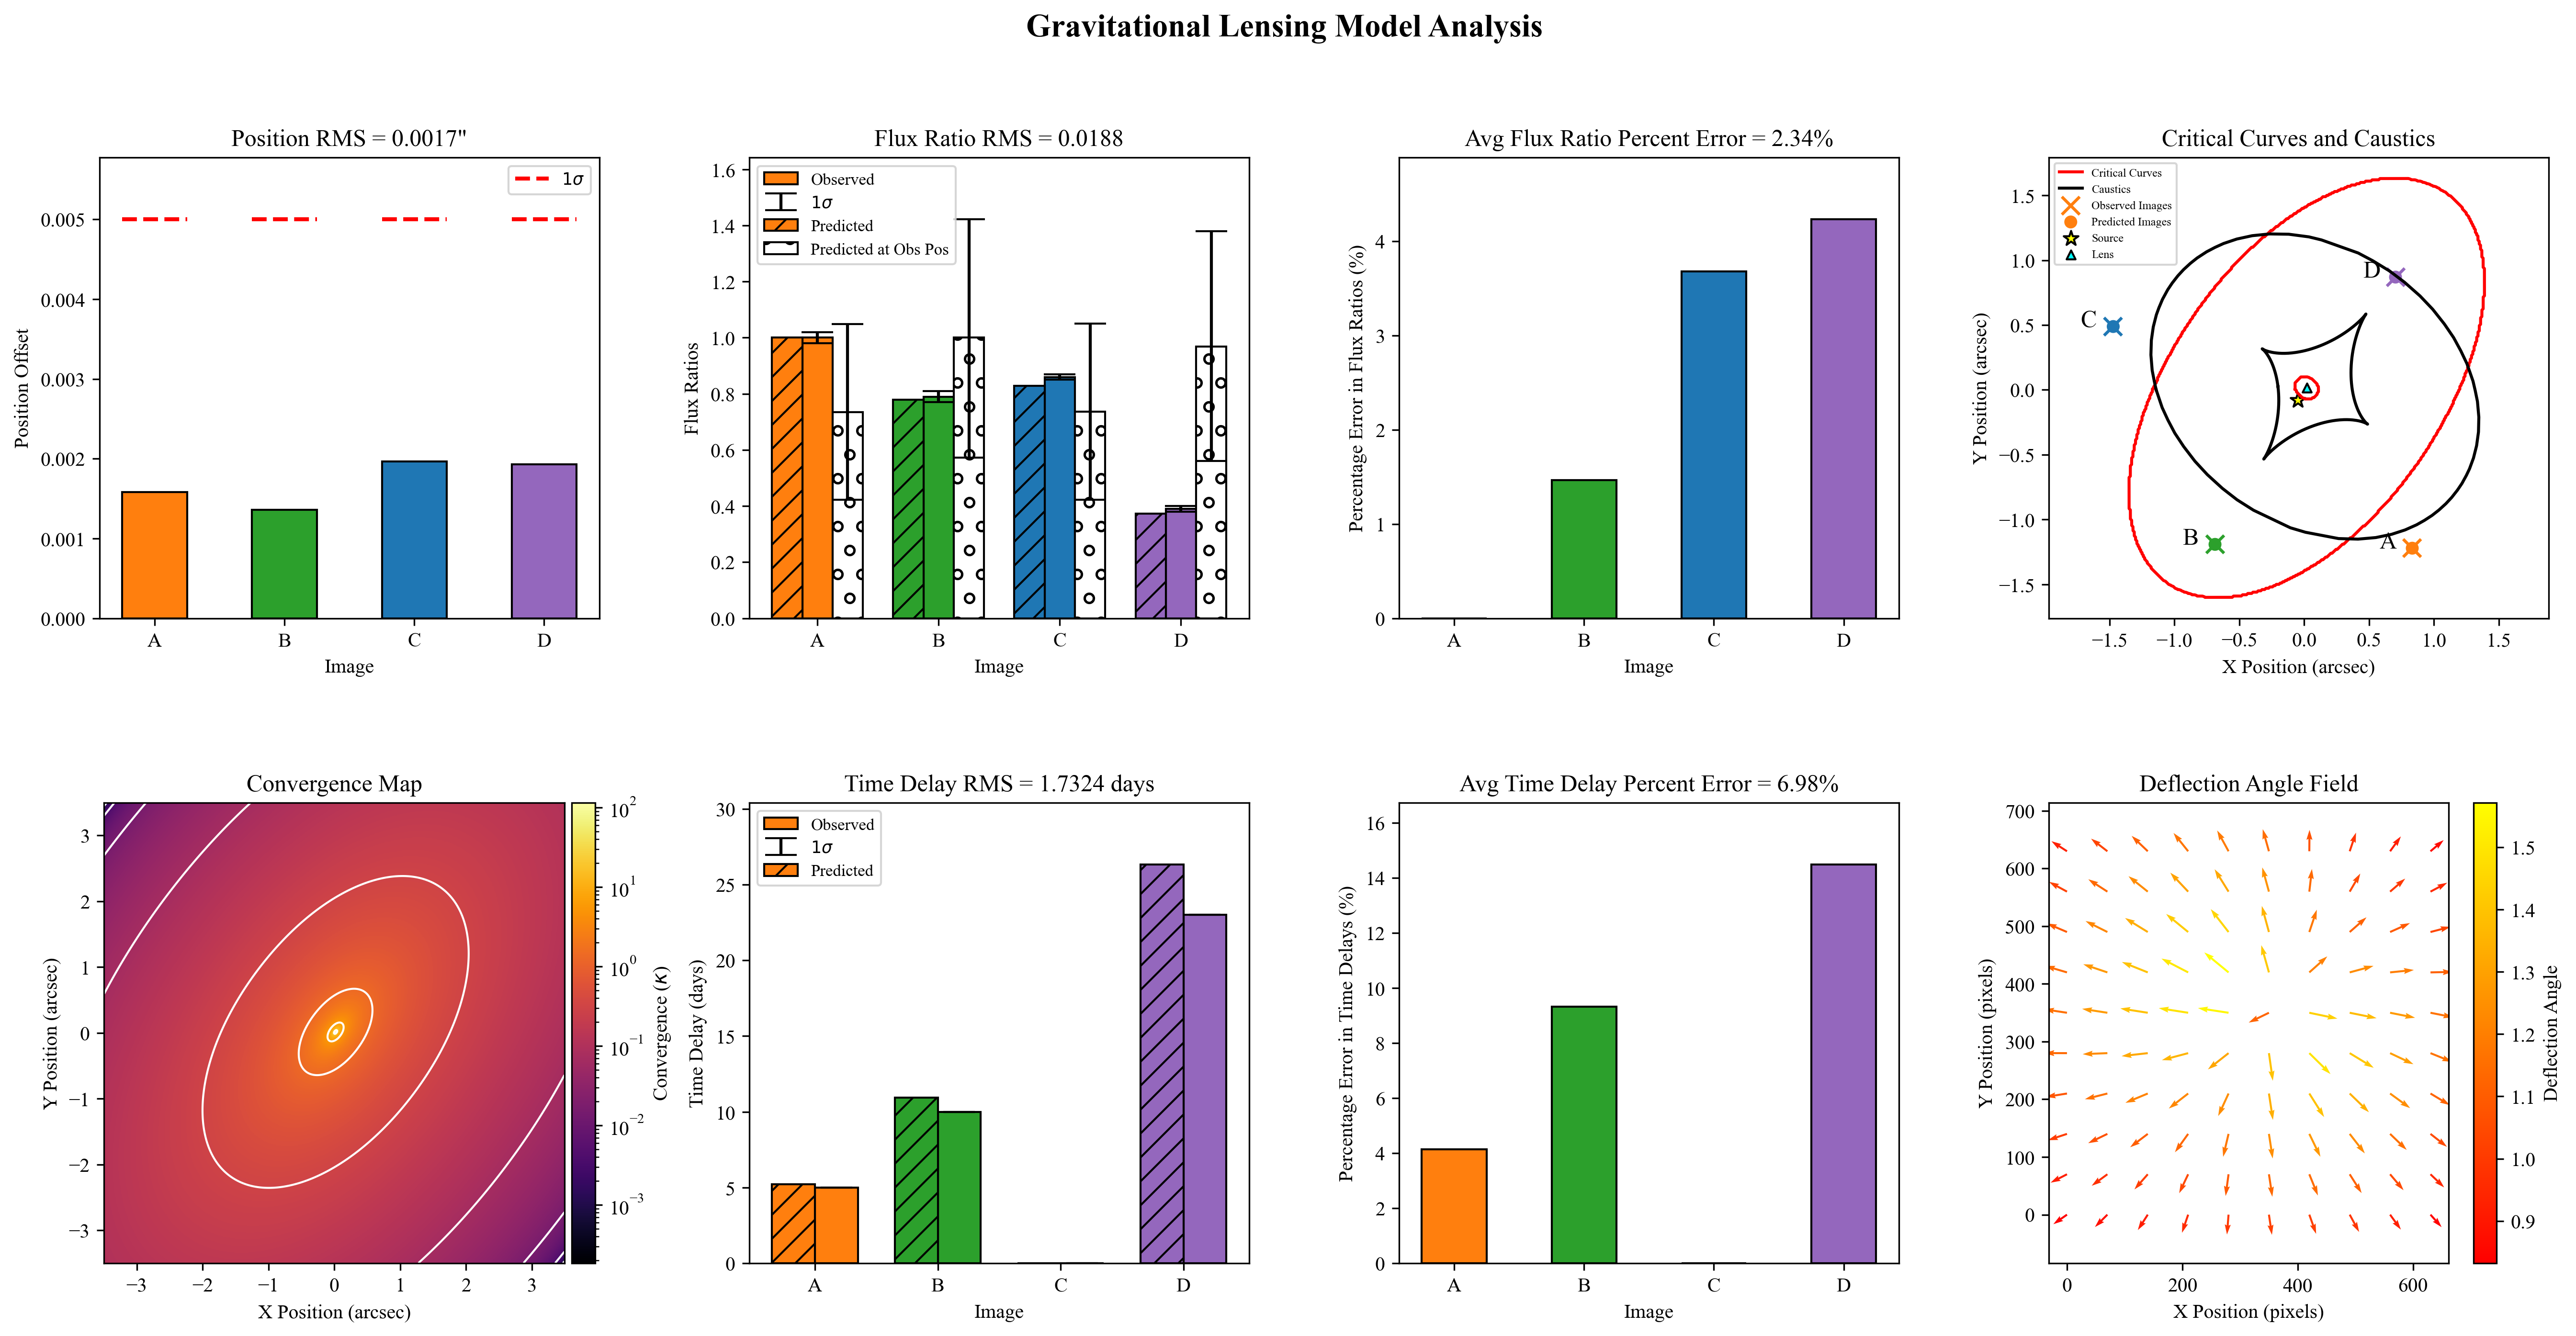

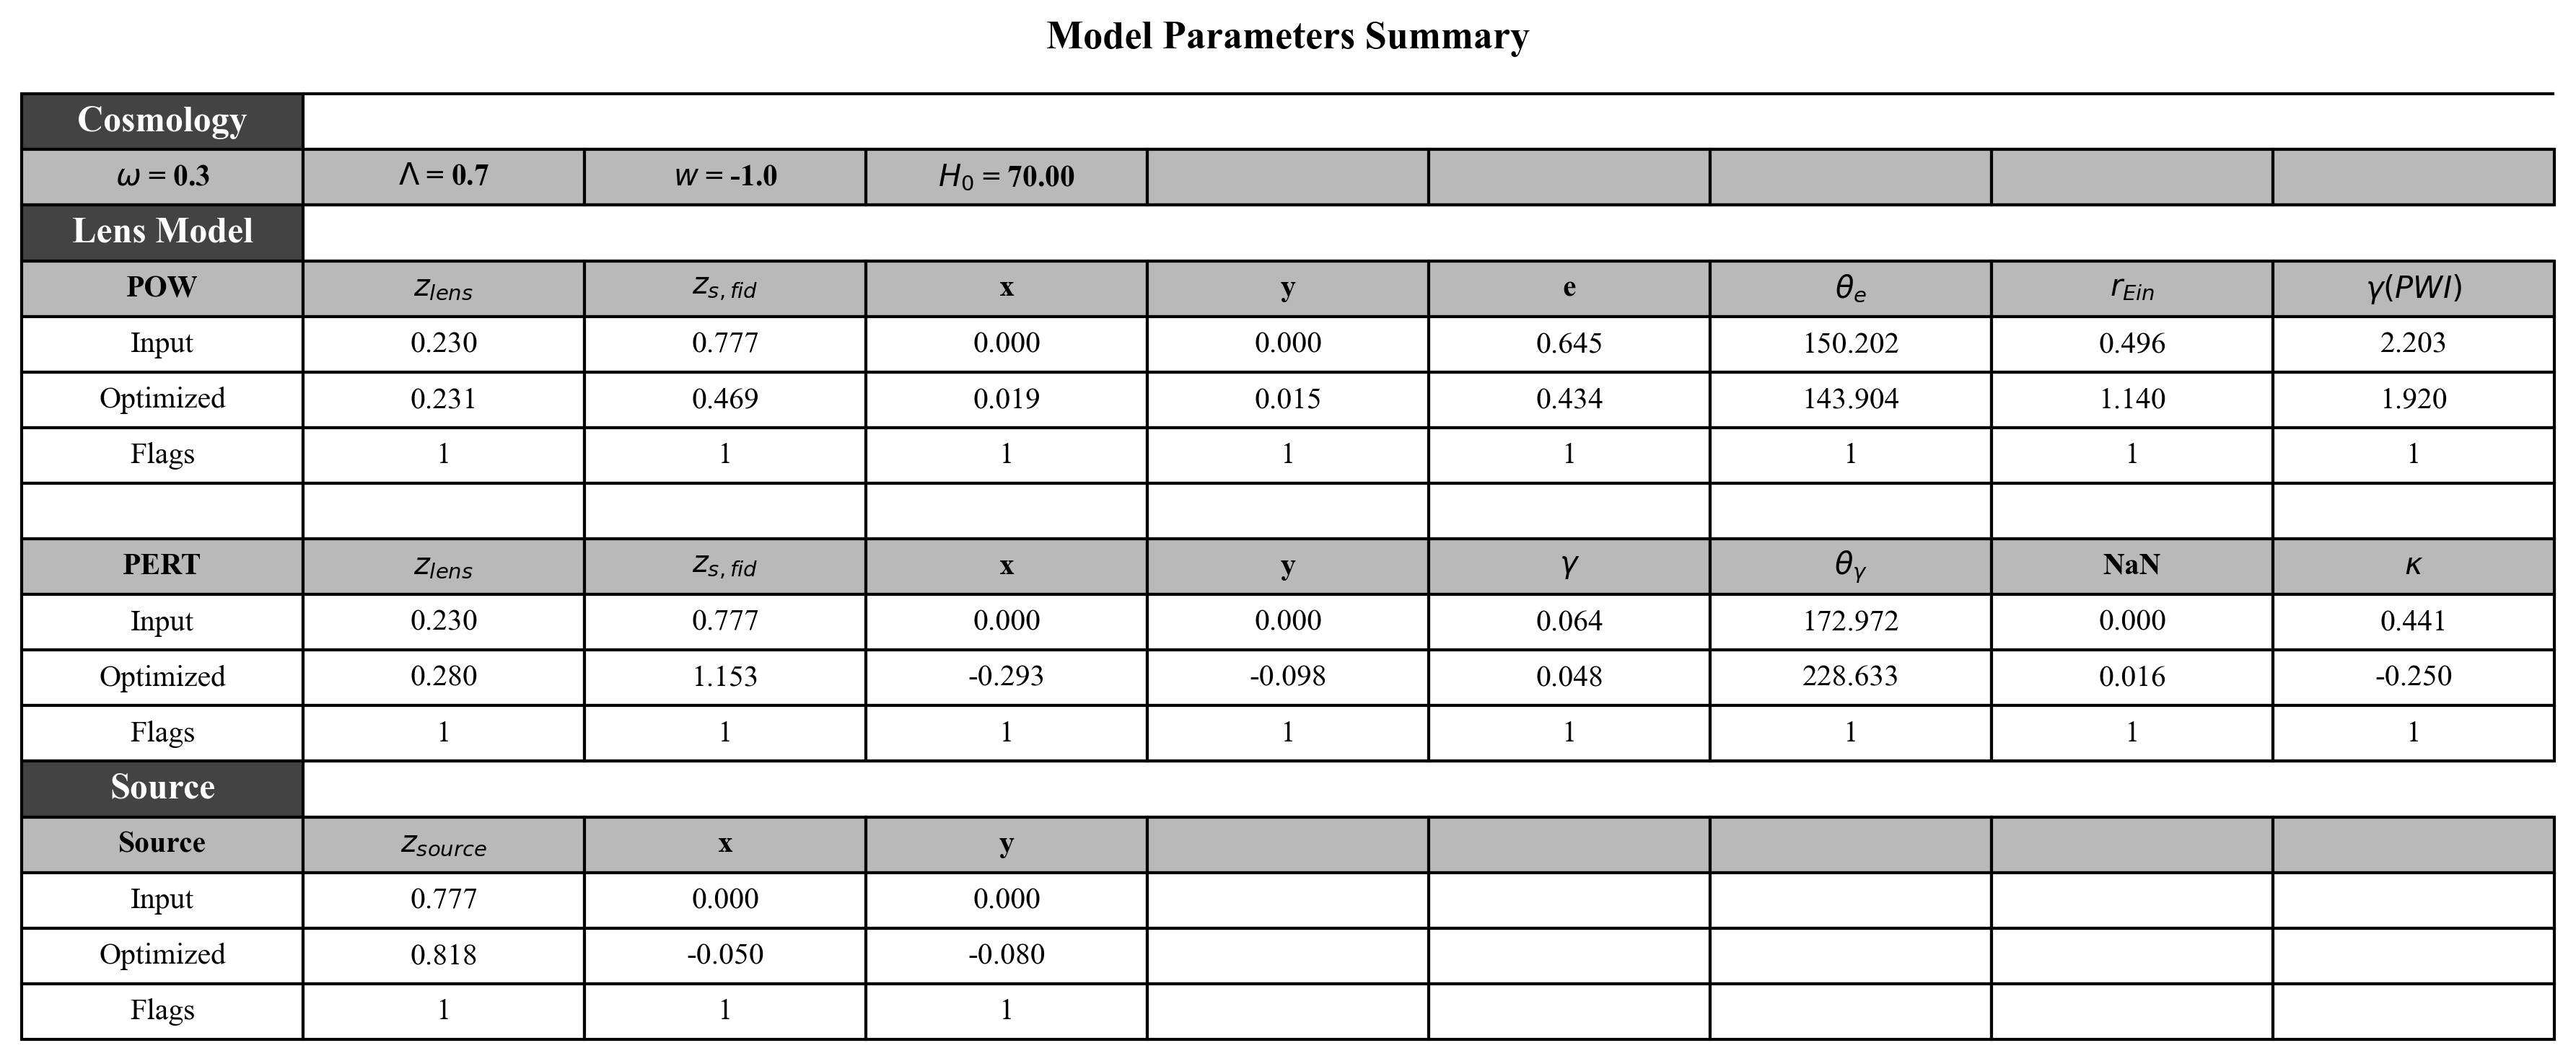

In [111]:
if plot_mode == 0:
    combined_plotting(obs_point, pred_point, bkg='white', posrms=posrms_flag, fluxrms=fluxrms_flag, fluxpercent=fluxper_flag, critcurves=crit_flag, kappamap=kappa_flag, timedelays=tdrms_flag, timedelaypercent=tdper_flag, deflectionfield=deflect_flag, table=table_flag,
             pos_rms_value=pos_rms, flux_rms_value=flux_rms_value, avg_percentage_error=avg_percentage_error, usemag=usemag, mag_ratio=mag_ratio, flux_obs_pos=flux_obs_pos,
             xi_interp_inner=xi_interp_inner, yi_interp_inner=yi_interp_inner, xi_interp_outer=xi_interp_outer, yi_interp_outer=yi_interp_outer,
             xs_interp_inner=xs_interp_inner, ys_interp_inner=ys_interp_inner, xs_interp_outer=xs_interp_outer, ys_interp_outer=ys_interp_outer,
             source_params=source_params, lens_params=lens_params, kappa=kappa, x_low=x_low, x_up=x_up, y_low=y_low, y_up=y_up,
             constraints=constraints, td_rms=td_rms, avg_percentage_error_td=avg_percentage_error_td,
             sections_to_plot=sections_to_plot,
             Xs=Xs, Ys=Ys, Us=Us, Vs=Vs, alphas=alphas, save_prefix=plot_save, dpi=dpi)
elif plot_mode == 1:
    plotting(obs_point, pred_point, bkg=bckg, posrms=posrms_flag, fluxrms=fluxrms_flag, fluxpercent=fluxper_flag, critcurves=crit_flag, kappamap=kappa_flag, timedelays=tdrms_flag, timedelaypercent=tdper_flag, deflectionfield=deflect_flag, table=table_flag,
             pos_rms_value=pos_rms, flux_rms_value=flux_rms_value, avg_percentage_error=avg_percentage_error, usemag=usemag, mag_ratio=mag_ratio, flux_obs_pos=flux_obs_pos,
             xi_interp_inner=xi_interp_inner, yi_interp_inner=yi_interp_inner, xi_interp_outer=xi_interp_outer, yi_interp_outer=yi_interp_outer,
             xs_interp_inner=xs_interp_inner, ys_interp_inner=ys_interp_inner, xs_interp_outer=xs_interp_outer, ys_interp_outer=ys_interp_outer,
             source_params=source_params, lens_params=lens_params, kappa=kappa, x_low=x_low, x_up=x_up, y_low=y_low, y_up=y_up,
             constraints=constraints, td_rms=td_rms, avg_percentage_error_td=avg_percentage_error_td, sections_to_plot=sections_to_plot,
             Xs=Xs, Ys=Ys, Us=Us, Vs=Vs, alphas=alphas, save_prefix=plot_save, dpi=dpi)
